Importación de Librerias

>Antes que todo, iniciaremos con la carga de las siguientes librerias:
>- Pandas
- Numpy
- Matplotlib
- SimpleImputer
- LabelEncoder

In [1]:
# Se realiza la importación de las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
# Preprocesamiento de Datos
from sklearn.impute import SimpleImputer as sim
from sklearn.preprocessing import LabelEncoder as le
# Modelos Predictivos
from sklearn.feature_selection import SelectKBest
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

>Bastara con importar una vez estas librerias en nuestro entorno, lo cual se sabra que han sido importadas y cargadas, en el momento en que pueda ser visualizado un numero entre los corchetes cuadradados `[ ]`.




#Fase 1 - Entendimiento del Negocio

Introducción

Como equipo de trabajo, se nos encomendó trabajar en base a un caso específico orientado a la climatología, de acuerdo a esto, se nos pide realizar un proceso de análisis con el objetivo de realizar una exploración, limpieza y transformación de los datos con el fin de generar información y conocimiento útil desde la fuente de los datos para apoyar la toma de decisiones en base a las necesidades de la organización.

Analisis de la Organización

Como equipo de trabajo, realizamos una investigación del contexto del caso o la organización, a medida que ibamos relacionando las variables o categorias que se nos entregaban, fuimos realizando diferentes tipos de búsqueda con el fin de corroborar ciertos tipos de información y de entender un poco más como se veía afectado al contexto del caso, como ejemplo, nos centramos en relacionar la temperatura máxima y mínima con las ciudades del DataSet, donde fuimos entendiendo un poco más el cómo funcionaba el clima, por otro lado y como segundo ejemplo, investigamos y análizamos las estaciones del año y en qué se veían afectadas al momento de llover. Asi bien la base de nuestro entendimiento de la organización, y de los cuales se relacionan totalmente con lo mencionado anteriormente, son las siguientes fuentes, que representan de una u otra manera cierta base en la que nos sostuvimos.

**Fuentes:**

Imagen del Clima en Australia
https://red-viajes.com/febrero-en-australia-clima-que-empacar-y-que-ver/

Clima Historico Darwin 
https://es.climate-data.org/oceania/australia/northern-territory/darwin-6322/

Clima Historico Sidney
https://es.climate-data.org/oceania/australia/new-south-wales/sidney-24/





## Carga de los Datos

>Si bien existen diversas formas de realizar una carga de los datos, ya sea mediante una URL, Google Drive, o bien consiguiendo tal archivo de forma local en nuestra computadora, en dicho caso se determinó utilizar esta última opción, dejando esta elección, simplemente por el hecho de que se piensa de que es la más sencilla y mejor escogida para un funcionamiendo de los datos, sin necesitar permisos para ser utilizados en drive, como por ejemplo.             
>Es por ésto, que se realizo el siguiente código, para cumplir con tal objetivo.

In [2]:
#Se menciona que desde el "ambiente" de google colab se importaran archivos, quienes seran cargados en la variable "uploaded"
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


## Lectura de los Datos

>Ya realizado la carga de estos mismos, procederemos a la lectura de estos, la cual se guardaria en una variable para luego ser utilizada en los analisis propuestos.

In [3]:
#Lectura del archivo cargado y almacenado en la variable "df"
df = pd.read_csv("weatherAUS.csv")

>Ya realizado dicha carga y lectura de datos, nos introduciremos a la exploración de datos, en donde crearemos diversos Data Frames con Pandas (La Librería), que nos permitirá realizar un análisis a estos mismos datos.

# Fase 2 - Entendimiento de los Datos

> Si hay algo que es importante en el guardado de datos como lo pueden ser el de este proyecto, es la de sacar provecho y valor a tanta información guardada. Es por esto que uno de los "primeros" para comenzar dicha declaración de valor de los datos, es analizándolos, en donde se encontrarán variados resultados que los podremos interpretar, de modo que estos sean el comienzo de algo más grande.
>
> Así bien, el proyecto da como tema central, la climatología o información sobre el clima que posee Australia, mediante esto, se dara a visualizar de maneras diversas, medidas relevantes para este análisis.

## Primera Interacción con los Datos 

>Existirán diversas formas de realizar análisis de los datos, pero una por las cuáles se empezará, es la de visualizar el DataFrame del archivo de forma general (tal como está), utilizando la variable df, como la variable que se utilizó para guardar el archivo de datos cargado anteriormente.  
>
>Esto principalmente, para saber cómo están distribuidos los datos en su inicio.
>
>Así bien, como se podrá observar más adelante, el archivo de datos (si se ejecuta tal código por debajo) se encuentra unido entre 2 dataframe, lo cual constituye un desorden para posteriores gráficos y análisis de estos mismos.




In [4]:
#Se visualiza el Data Frame el cual fue ejecutado por el comando "df" 
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


>Asi bien, comenzamos por visualizar la informacion del dataframe de sobre el clima en Australia.

In [5]:
#Información del DataFrame sobre el Clima
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
#Visualizar las 5 primeras columnas del DataFrame Clima.
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


**Interpretación**
>Se puede observar que gran parte de los datos, en ciertas características, como lo pueden ser **Evaporation** o **Sunshine** se encuentran con tipos de datos NaN, los cuáles no nos indican de forma exacta su significado (sobre a que se refiere con cierta cantidad de *milímetros* de evaporación), sin olvidar que simplemente podremos saber que no son un tipo de dato numérico.
>
> Por otro lado, se puede observar sobre el mismo dataframe, que existe una característica de este Data Set, la cual se define como una **Etiqueta**, que representa un aspecto relevante para posteriores análisis e interpretación de los datos en evaluaciones dedicadas al entrenamiento de éstos.


##Analisis de los Datos

>Si bien, como se pudo visualizar, obtuvimos un DataFrame relacionado al Clima en Australia, lo cuál nos dará diversos resultados que posteriormente seleccionaremos para lo que se realizará.
>
>De acuerdo a tales datos es que se realizarán diversos análisis, los cuales incluyen estudios declarados como interpretaciones en base a ciertos valores, que estarán presentes en las diferentes `Medidas de Tendencia y Dispersión` conocidos.
>
>Asi bien, para introducir esta sección, se mostrará una información estadística de forma general (del DataFrame seleccionado), en donde posteriormente ciertas medidas serán interpretadas individualmente, de acuerdo a la columna seleccionada para tal ejercicio.


In [7]:
#Nombramos al método "describe" donde nos mostrará una clase de estadística descriptiva de cada columna numérica.
df.describe()  

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


**Interpretación**

>Se pudo observar que dentro de la temperatura mínima, entre el cuartil 75% al maximo valor encontrado, existe un gran salto de la distribución de los datos, en base a la muestra.

De acuerdo a la descripción de los datos, las definiciones de las medidas respecto a los registros numéricos, son catalogadas como:
>1.   **25%, 50%, 75%**: Cuartiles de Posición
2.   **Max**: Valor Maximo Encontrado
3.   **Min**: Valor Minimo Encontrado
4.   **Mean**: Promedio entre los valores
5.   **Std**: Desviación Estandar   
6.   **count**: Recuento







###Medidas de Tendencia Central

> Las medidas de tendencia central, son valores que generalmente se ubican en la parte central de la distribución de datos. Estas medidas son usadas para variables cuantitativas, aportando una idea acerca del comportamiento de la variable. Entre las medidas de tendencia central más importantes podemos encontrar:



####Moda
> La moda es el dato que tiene mayor frecuencia, o bien es el dato que más se repite.





In [8]:
#almacenamos en la variable "mod_DirRafaga" la moda de tales conjuntos de datos
mod_DirRafaga = df['WindGustDir'].mode()
#almacenamos el dato "moda" en la variable row.
row = (['Moda'])
#creamos un dataframe en base a la librería pandas para mostrar la moda de las direcciones de las ráfagas catalogadas como "WindGustDir"
rest = pd.DataFrame({ 'Medida' : row,'WindGustDir': mod_DirRafaga})
rest

,Medida,WindGustDir
0,Moda,W


**Interpretación**

> La dirección más fuerte de las ráfagas de viento más frecuentes en 24 horas, ocurridas en Australia, es en dirección al "W" (Oeste).



####Mediana

> La mediana, es el valor que se encuentra en el centro de un conjunto de datos, cuando estos se ordenan de menor a mayor.


In [9]:
#almacenamos en la variable "med_ubicacion" la mediana de tal conjunto de datos.
med_ubicacion = df['WindGustSpeed'].median()
#almacenamos un texto como "Mediana" en la variable row.
row = (['Mediana'])
#creamos un dataframe en base a la libreria pandas para mostrar la mediana
rest = pd.DataFrame({  'Medida': row, 'VelRafaga': med_ubicacion})
rest

,Medida,VelRafaga
0,Mediana,39.0


**Interpretación**

> El 50% de las velocidades de rafagas de viento en 24 hrs, en dichas estaciones metereológicas registradas, son menor o igual a 39 km/hr.




####Media Aritmetica o Promedio

> Las media o promedio, es el valor que está en el centro de equilibrio de un conjunto de *observaciones*. Se calcula sumando todos los valores y dividiendo por el número de datos.




In [10]:
#almacenamos en la variable "media_VelRafaga" la media de tal conjunto de datos.
media_VelRafaga = df['WindGustSpeed'].mean()
#almacenamos el dato "Media" como texto en la variable row.
row = (['Media'])
#creamos un dataframe en base a la libreria pandas para mostrar la mediana de las rafagas de vientos catalogadas como "media_VelRafaga".
rest = pd.DataFrame({  'Medida': row, 'VelRafaga': media_VelRafaga})
rest

,Medida,VelRafaga
0,Media,39.984292


**Interpretación**

> El total de velocidades de ráfagas de viento más fuerte como promedio en 24 horas, es de 39 (km/hr).

###Medidas de Tendencia no Central

>Si bien examinamos ciertos números los cuáles nos mostraban el centro de la distribución de una serie de valores en base a observaciones, también es relevante conocer ciertos puntos característicos los cuales nos señalen la divisón de un conjunto de números agrupados en base a ciertos valores de una serie de datos de forma ordenada. Para esto, es que se analizarán los cuartiles, quintiles, deciles y percentiles.

####Cuantiles

#####Cuartiles

> Los cuartiles se componen de 3 partes, los cuales se nombran como *primer cuartil (25%)*, *segundo cuartil (50%)* y *tercer cuartil (75%)*. Su interpretación se describirá de acuerdo al siguiente valor tomado del DataFrame `df_lluvia`.

In [11]:
#Se almacenan los cuartiles de la columna MinTemp en la variable "valcu"
valcu = df['MinTemp'].quantile([.25, .5, .75])
#Transferimos los datos de los cuartiles a un Dataframe de Pandas para una mejor visualización
cuartMinTemp = pd.DataFrame({'T°Min': valcu})
cuartMinTemp

,T°Min
0.25,7.6
0.50,12.0
0.75,16.8


**Interpretacion**

>*   Cuartil 1 (25%): El 25% de los datos estan por debajo de la temperatura 7.6°C votos catalogados como "Mínima Temperatura".
>*   Cuartil 2 (50%): El 50% de los datos estan por debajo de la temperatura 12°C catalogados o representados como "Mínima Temperatura".
>*   Cuartil 3 (75%): El 75% de los datos estan por debajo de la temperatura de 16.8°C catalogados como "Mínima Temperatura".

#####Quintiles

> Si bien los cuartiles se componian de 4 partes, los quintiles se componen de 5 partes, estos a su vez irán ordenados de una forma ascendente con un 20% de las observaciones en cada parte.
> Por lo tanto, en esta medida utilizaremos la misma columna la cuál nos preeve de los datos necesarios para este ejercicio.




In [12]:
#Se almacenan los quintiles de la columna MinTemp en la variable "valqui"
valqui = df['MinTemp'].quantile([.2, .4, .6, .8])
#Transferimos los datos de los quintiles a un Dataframe de Pandas para una mejor visualización
quinMinTemp = pd.DataFrame({'T°Min': valqui})
quinMinTemp

,T°Min
0.2,6.6
0.4,10.3
0.6,13.8
0.8,18.0


**Interpretacion**

>*   Quintil 1 (20%): El 20% de los datos estan por debajo de 6.6° catalogados o representados como "Mínima temperatura".
>*   Quintil 2 (40%): El 40% de los datos estan por debajo de 10.3° catalogados o representados como "Mínima temperatura".
>*   Quintil 3 (60%): El 60% de los datos estan por debajo de 13.8° catalogados o representados como "Mínima temperatura".
>*   Quintil 4 (80%): El 80% de los datos estan por debajo de 18.0° catalogados o representados como "Mínima temperatura".

#####Deciles

> Los deciles se componen de dividir la muestra ordenada, de una forma ascendente en 10 partes iguales con un 10% de tales observaciones en cada parte que le compone.




In [13]:
#Se almacenan los deciles de la columna MinTemp en la variable "valdel"
valdel = df['MinTemp'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
#Transferimos los datos de los deciles a un Dataframe de Pandas para una mejor visualizacion
delMinTemp = pd.DataFrame({'T°Min': valdel})
delMinTemp

,T°Min
0.1,3.9
0.2,6.6
0.3,8.5
0.4,10.3
0.5,12.0
0.6,13.8
0.7,15.8
0.8,18.0
0.9,20.8


**Interpretacion**

*   Decil 1 (10%): El 10% de los datos estan por debajo de 3.9°C catalogados como "Mínima temperatura".
*   Decil 2 (20%): El 20% de los datos estan por debajo de 6.6°C catalogados como "Mínima temperatura".
*   Decil 3 (30%): El 30% de los datos estan por debajo de 8.5°C catalogados como "Mínima temperatura".
*   Decil 4 (40%): El 40% de los datos estan por debajo de 10.3°C catalogados como "Mínima temperatura".
*   Decil 5 (50%): El 50% de los datos estan por debajo de 12.0°C catalogados como "Mínima temperatura".
*   Decil 6 (60%): El 60% de los datos estan por debajo de 13.8°C catalogados como "Mínima temperatura".
*   Decil 7 (70%): El 70% de los datos estan por debajo de 15.8°C catalogados como "Mínima temperatura".
*   Decil 8 (80%): El 80% de los datos estan por debajo de 18.0°C catalogados como "Mínima temperatura".
*   Decil 9 (90%): El 90% de los datos estan por debajo de 20.8°C catalogados como "Mínima temperatura".


#####Percentiles

> Los percentiles representan la división de la muestra, en 100 parte iguales ordenadas de forma ascendente, de esta forma, comienza por un 1% hasta el 100%.
Por lo cuál, se puede visualizar tal medida en base al siguiente código:

*Nota: solo se mostrarán algunos percentiles, ya que de esta manera ya no repite tanto la interpración para tal medida.*

In [14]:
#Se almacenan los percentiles de la columna MinTemp en la variable "valpec"
valpec = df['MinTemp'].quantile([.01, .02, .4, .8, .9, .99])
#Transferimos los datos de los percentiles a un Dataframe de Pandas para una mejor visualización
percMinTemp = pd.DataFrame({'T°Min': valpec})
percMinTemp

,T°Min
0.01,-1.8
0.02,-0.4
0.40,10.3
0.80,18.0
0.90,20.8
0.99,25.8


**Interpretacion**


>*   Percentil 1 (1%): El 1% de los datos estan por debajo de -1.8°C catalogados o representados como "Mínima temperatura".
>*   Percentil 2 (2%): El 2% de los datos estan por debajo de -0.4°C catalogados o representados como "Mínima temperatura".
>*   Percentil 40 (40%): El 40% delos datos estan por debajo de 10.3°C catalogados o representados como "Mínima temperatura".
>*   Percentil 80 (80%): El 80% de los datos estan por debajo de 18.0°C catalogados o representados como "Mínima temperatura".
>*   Percentil 90 (90%): El 90% de los datos estan por debajo de 20.8°C catalogados o representados como "Mínima temperatura".
>*   Percentil 99 (99%): El 99% de los datos estan por debajo de 25.8°C catalogados o representados como "Mínima temperatura".

###Medidas de Dispersión


####Rango


> La dispersión, en términos de diferencia entre 2 valores (colocados en extremos de cada conjunto de los dato) puede medirse de la siguiente forma. Calculando la diferencia entre el máximo y mínimo valor de la distribución. Sin embargo el único inconveniente es que puede ser poco representativa si surgen valores *atípicos*, es por esta razón, que se utilizá el rango intercuartil, la cual se desarrolla en obtener la diferencia entre el tercer y primer cuartil.
>
> Es por esto, que mediante los cálculos ya realizados de los cuartiles en base a la columna "MinTemp" del DataFrame "df", se procederá a realizar tal cálculo:




In [15]:
#Obtenemos el 1er y 2do cuartil de la columna "T°Min"
cuartrang = df['MinTemp'].quantile([.75, .25])
#Los cuartiles 3 y 1 son almacenados en una columna llamada 'Resultado' (referente al resultado de la resta de este rango intercuartil)
cuartrang['Resultado'] = cuartrang[.75] - cuartrang[.25]
#El rango intercuaril resultante es transferido a un Dataframe, visualizado posteriormente
pd.DataFrame({ 'Valores': cuartrang}).T

,0.75,0.25,Resultado
Valores,16.8,7.6,9.2


**Interpretación**

> Se puede observar, que a medida que aumenta la dispersión de los datos, el rango intercuartil, se hace más "grande".

*Nota: Esta interpretación puede ser gráficamente mas entendida en ciertos gráficos que demuestran la dispersión de los datos.*


####Desviacion Estandar

> Se le conoce a la desviación estándar como el cuadrado de la raiz cuadrada, esto particularmente porque tiene las unidades de medidas elevadas al cuadrado, por lo que para darle mas claridad y facilidad de interpretar, es que se decide tener este valor.


> Así bien, se dará comienzo a la aplicacion de dicha medida, en base a tales datos de la columna "MinTemp".

In [16]:
#Con el "comando" .std() damos por obtenido la desviacion estandar de un conjunto de datos numericos.
df['MinTemp'].std()

6.403282674671229

**Interpretación**

> De acuerdo a tal resultado, se puede concluir con que la dispersión de los datos se encuentra por los 6.403282674671229 °C como Temperatura Minima, respecto a la media.




####Coeficiente de Variación


> Esta medida se define como la razon entre la desviación estándar y la media aritmética, esta puede ser expresada en un porcentaje que represente la multiplicación por 100.
El cálculo de la siguiente media, da como resultado lo siguiente:

In [17]:
#Divídimos tanto la desviación estándar entre el promedio y conseguimos el valor del coeficiente de variación.
coef_var = df['MinTemp'].std() / np.mean(df['MinTemp'])
coef_var

0.5254449892674756

**Interpretación** 

> De acuerdo a las temperaturas mínimas en °C registradas, dicho valor representa un acercamiento más próximo al cero, por lo cual existe poca variabilidad de los datos.

###Gráficos

>Los gráficos constituyen un tipo de representación visual, el cual puede atribuirse tanto para una operación como para una demostración, en donde dicha representación, incluirá tanto figuras como signos para comunicar una serie de conceptos.
>
>Así bien, hemos demostrado el análisis de datos mediante varios tipos de medidas, en donde principalemente vemos un resultado el cual puede ser interpretado y relacionado, con nuestro objetivo de realizar *Mineria de Datos* o en este caso *Análisis de Datos Inicial* a tal proyecto. Es por esto que para llegar a obtener una vista mas representativa de esos u otros datos, esque aplicaremos algunos gráficos a continuación.



####Histograma

Distribución de la velocidad de la ráfaga de viento más fuerte en 24 horas

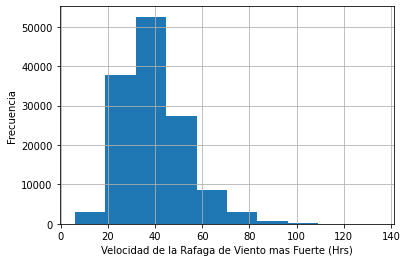

In [18]:
#Obtenemos un gráfico de histogramas de acuerdo al feature "WindGustSpeed"
df['WindGustSpeed'].hist(bins=10)
#Renombramos el titulo de la variable "X" a "Velocidad de la Ráfaga de Viento más Fuerte (Hrs)"
plt.xlabel("Velocidad de la Rafaga de Viento mas Fuerte (Hrs)")
#Renombramos el título de la variable "Y" a "Frecuencia"
plt.ylabel("Frecuencia")
plt.show()

**Interpretación**

> De acuerdo a lo observado, se puede apreciar que la mayor concentración de *Ráfagas de Viento*, que ocurrieron dentro de las 24 Horas se encuentran entre 20 y 40 Horas aproximadamente. 
>
> Se puede visualizar que la menor frecuencia de Ráfagas de Viento se encuentra entre 80 y 120 Horas.
>
> Se puede observar que la muestra esta distribuida desde 0 hasta a lo sumo 120 horas, de Ráfagas de Viento.

####Barra

In [19]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [20]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

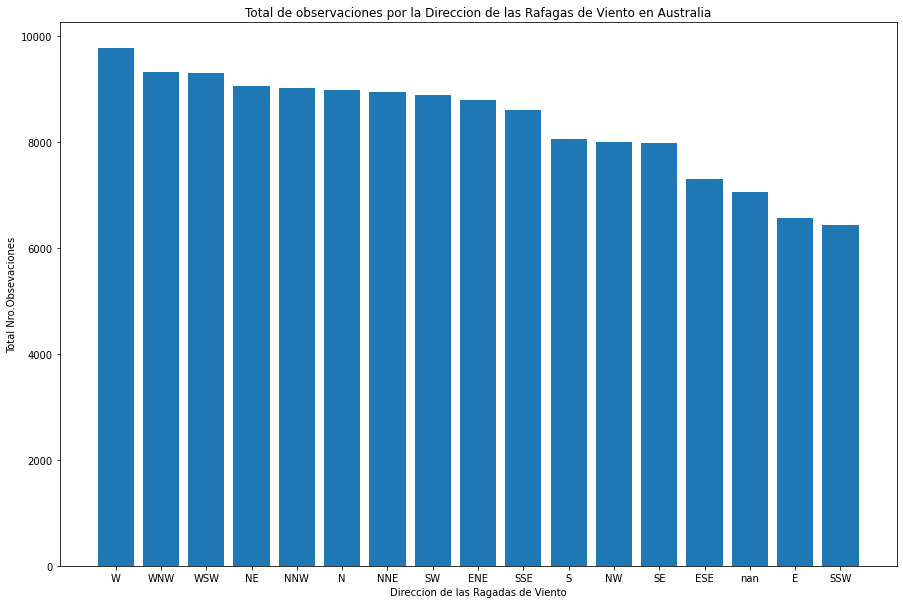

In [21]:
def getGraficoBarras(label_x, label_y, title):
  v_hist = df['WindGustDir'].astype(str)
  x_values = v_hist.unique()
  y_values = v_hist.value_counts().tolist()
  plt.figure(figsize=(15, 10))
  plt.bar(x_values, y_values)
  plt.title(title)
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.show()
getGraficoBarras('Direccion de las Ragadas de Viento', 'Total Nro.Obsevaciones', "Total de observaciones por la Direccion de las Rafagas de Viento en Australia")


**Interpretación**

> Se puede apreciar mediante el gráfico que el mayor número de observaciones por dirección de ráfagas de viento en Australia, se centran en dirección oeste (west), con un total aproximado 18000 observaciones.



####Circular

Direcciones de la rafaga de viento en relacion de la velocidad de tales rafagas de viento.

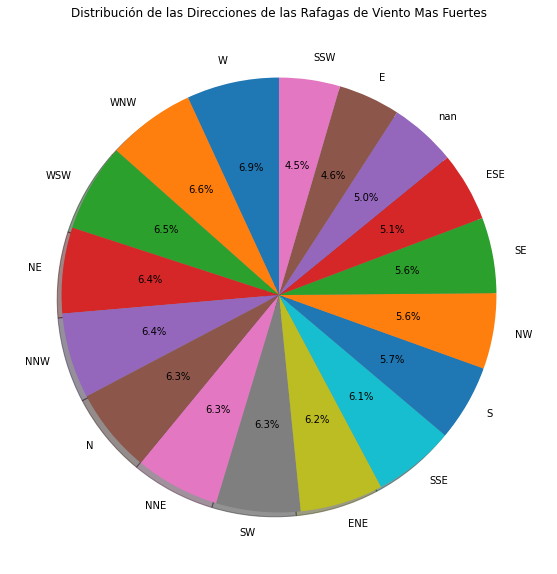

In [22]:
v_cir = df['WindGustDir'].astype(str)

tipos = list(v_cir.unique())
total = list(v_cir.value_counts())
explode = [0.4 if total[0] == max(total) else 0, 0.4 if total[1] == max(total) else 0] # Destacar algunos
plt.figure(figsize=(15, 10))
plt.pie(total, labels=tipos, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribución de las Direcciones de las Rafagas de Viento Mas Fuertes')
plt.show()

**Interpretación**

> De acuerdo a lo examinado, se puede apreciar que la gran cantidad de ráfagas de viento más fuertes, se encuentra catalogada como en dirección al Oeste ("W") en su gran mayoría, con un porcentaje superior de 6.9%.
>
> De acuerdo a lo examinado, se puede apreciar que la en menor cantidad de ráfagas de viento mas fuertes, se encuentra catalogada como la dirección al Sur Sur Oeste ("SSW") en su menor mayoría, con un porcentaje de 4.5%.




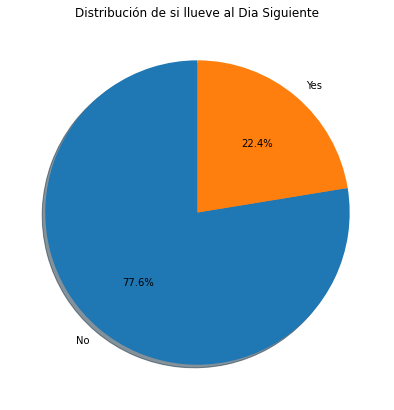

In [23]:
tipos = list(df['RainTomorrow'].unique())
total = list(df['RainTomorrow'].value_counts())
explode = [0.4 if total[0] == max(total) else 0, 0.4 if total[1] == max(total) else 0] # Destacar algunos
plt.figure(figsize=(7, 7))
plt.pie(total, labels=tipos, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribución de si llueve al Dia Siguiente')
plt.show()

**Interpretación**

Se puede determinar que probablemente no llueva al siguiente día en Australia, lo cuál es reafirmado con un 77.6% sobre un "NO" como posibilidad de llover.

####Dispersión

Relación entre la dirección de las ráfagas de viento y la velocidad de las ráfagas de viento.

In [24]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


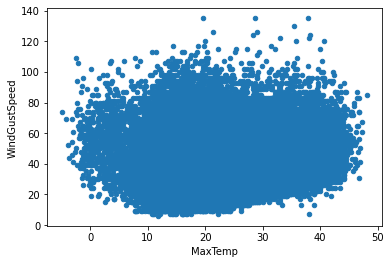

In [25]:
#Conseguimos visualizar la dispercion de los datos relacionados entre la velocidad del viento respecto a la Temperatura maxima
df.plot.scatter(y="WindGustSpeed", x="MaxTemp")

**Interpretación**

> Se puede examinar mayormente que mientras la velocidad de las ráfagas de viento, no supere una velocidad de aproximadamente 110 km/hr, la mayor concentración de datos se encuentran entre 0 y 45 °C como temperatura máxima.



#Fase 3 - Preparación de la Data

>A modo de introducción, dentro de lo que es la preparación de los datos, se ve previsto de la selección de los datos, la limpieza de éstos, la construcción de nuevas variables asociadas al caso, la integración de los datos y el formato que se tiene que seguir a cada variable y/o dato. Así bien, comenzamos con las transformaciones tanto de valores NaN como de variables categóricas, con el fin de obtener la data preparada para la siguiente fase.


## Limpieza y Transformación de los Datos

> De acuerdo al Data Set entregado, como equipo de trabajo determinamos que para obtener mejores resultados sobre nuestros análisis de datos, es importante realizar una limpieza que alvergue un tratamiento de valores NaN y una transformación de las variables categóricas, para el correcto trabajo de esta data. De este modo, lograremos graficar la información que se deberá mostrar, de acuerdo al conocimiento que estemos buscando obtener.





### Tratamiento de valores NaN

> Asi bien, procederemos a realizar el tratamiento de valores NaN (o Null), en donde comenzaremos por repasar los nulls encontrados en el data DataFrame *df*, y posteriormente con el análisis y tratamientos de estos tipos de valores "perdidos".
>
>Por lo cuál, para enfoncarnos en un punto en donde podamos tener como base tal tratamiento, es que llegamos a investigar sobre alguna idea sobre el cual proponer tratar tales valores en base a la mediana o la media, es por esto, que se llego a la conclusión que mediante los valores atípicos encontrados en cada columna, determinaremos el usar una medida u otra. Por otro lado, para determinar si usar la moda o la constante es que esta sera descrita en cada bloque de "Análisis", donde cabe mencionar que no sabremos si es la mejor opción posible hasta intentar con todas las opciones disponibles para el caso.
>
>*Link de investigación sobre ciertas medidas de tendencia central*
>
> https://support.zendesk.com/hc/es/articles/228989407-La-media-vs-la-mediana

In [26]:
#Buscamos los datos NaN y los agrupamos en una matriz, mostrandonos solamente si esque existe aunque sea un solo NaN en todo el DataFrame
df.isna().any().any()

True

**Análisis**

> Se confirma y visualiza que se encuentran valores NaN en el Data Set.

In [27]:
# Total de Valores NaN en cada Columna o Feature
for feature in df.columns:
  print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

**Análisis**

> Se examina que solamente en las columnas Date, Location, RISK_MM y Rin_Tomorrow, no existe ningun valor NaN dentro de todos los Datos que Integran. 

In [28]:
# Transferimos el Data Frame "df" a una variable, donde esta sera ocupada en tratamientos y transformaciones
df_clima = pd.DataFrame(df)
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [29]:
# Agrupación de las columnas por tipo de datos
tipos = df_clima.columns.to_series().groupby(df_clima.dtypes).groups
# Conociendo la lista de columnas categóricas
cObj = tipos[np.dtype('object')]
# Cantidad de columnas con datos categóricos.
len(cObj) 

7

**Análisis**

> Se puede apreciar que en el DataFrame "df_clima" encontramos 7 columnas de tipo objeto, los cuales presentan datos categóricos.

In [30]:
# Conociendo la lista de columnas numéricas
columnas = df_clima.columns
cnum = list(set(columnas) - set(cObj))
len(cnum)

17

**Análisis**

> Se puede apreciar que en el DataFrame "df_clima" encontramos 17 columnas de tipo numérico definidos como Float (o por punto flotante), los cuáles presentan datos con decimales.

Metodo de Transformacion de Variables Categoricas

> A modo de análisis, especificar o dar a conocer el utilizamiento del simpleImputer para la transformación de los NaN, que como se conoce, puede sustituir los valores nulos por alguna de las estrategias escogidas en los siguientes bloques. Por otro lado, el hecho de haber utilizado o ejecutado cada una de las categorías mediantes bloques separados, es por un tema lógico de ordenamiento y análisis para la sustitución de los "NaN" o nulos, y por otro lado, de que dentro de la sustitución de las categorías era más conveniente la sustitución por diferentes estrategias disponibles.
>
> Por último, dar a conocer que no se utilizó el método de "fillna" por el hecho de ver el funcionamiento o la estrategia del "SimpleImputer" básicamente



In [31]:
#MinTemp
#Transformamos los valores NaN, con datos referentes al promedio, con el algoritmo Simple Imputer. 
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['MinTemp']])
df_clima['MinTemp2'] = imp.transform(df_clima[['MinTemp']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4


**Análisis**

> Se puede dar a interpretar, de que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer, porque sustituye estos valores ''NaN'' o nulos por otros valores, segun varias estrategias, en éste caso, el promedio de "MinTemp2"o mínima temperatura.
>
>Por lo tanto, el promedio está es mas ajustable a este tipo de caracteristica, en donde por temas de encontrar valores atipicos de tal columna, tal caracteristica no presenta en gran variabilidad o dispersión de tales valores que se escapen de la muestra.






In [32]:
#MaxTemp
#Transformamos los valores NaN, con datos referentes al promedio, con el algoritmo Simple Imputer. 
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['MaxTemp']])
df_clima['MaxTemp2'] = imp.transform(df_clima[['MaxTemp']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9


**Análisis**

> Se puede dar a interpretar, de que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer, porque sustituye estos valores ''NaN'' o nulos por otros valores, segun varias estrategias, en éste caso el promedio de la característica "MaxTemp2" se encuentra de igual forma en la clasificación de estar enfocado a la Temperatura, y por otro lado, un punto a favor de utilizar el promedio como base de tratamiento, es que de igual forma no presenta valores atípicos o datos excluyentes de la muestra.


In [33]:
#Rainfall
#Transformamos los valores NaN, con datos referentes al promedio, con el algorítmo Simple Imputer. 
imp = sim(strategy='median', missing_values=np.nan)
imp.fit(df_clima[['Rainfall']])
df_clima['Rainfall2'] = imp.transform(df_clima[['Rainfall']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0


***Análisis***

> Se puede dar a interpretar, de que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer, en donde en éste caso, la mediana se dio a ocupar para la columna "RainFall2" o Lluvia, principalmente por la vista de valores atípicos u outliers, los cuales se escapan de tal muestra de dispersión de datos.


In [34]:
#Evaporation
#Transformamos los valores NaN, con datos referentes al promedio, con el algoritmo Simple Imputer. 
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Evaporation']])
df_clima['Evaporation2'] = imp.transform(df_clima[['Evaporation']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824


**Análisis**

> Se puede dar a interpretar, de que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer, siendo en base a la medida de la mediana, la cual generalmente será ocupada para Features con ciertos valores atípicos, esto puede deberse a que la evaporación pueda depender de varios factores los cuales dan a visualizar tal dispersión de datos, esto nos da por justificar el uso del mismo, dando a entender que si bien esta es un valor numérico no es una razón suficiente para una elección de tal magnitud.


In [35]:
#Sunshine 
#Transformamos los valores NaN, con datos referentes al promedio, con el algorítmo Simple Imputer. 
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Sunshine']])
df_clima['Sunshine2'] = imp.transform(df_clima[['Sunshine']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853


**Análisis**

> Se puede dar a interpretar, de que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer, en donde al igual que en métodos anteriores se enfocó en determinar que medida utilizar en base a "valores atípicos", lo cual de acuerdo a tal análisis, es que se deberá utilizar el promedio, ya que no posee gran cantidad de outliers, posiblemente por su poca relacion con otras variables es que puede llegar a ser mas "constante", no en valores, sino en la secuencia que presenta el uno del otro, en donde finalizará tal recorrido con sustituir estos valores ''NaN'' o nulos por otros valores determinados por la mediana.

In [36]:
#WindGustDir 
#Transformamos los valores NaN, con datos referentes al mas frecuente, con el algorítmo Simple Imputer. 
imp = sim(strategy='most_frequent', missing_values=np.nan)
imp.fit(df_clima[['WindGustDir']])
df_clima['WindGustDir2'] = imp.transform(df_clima[['WindGustDir']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N


**Análisis**

> Se puede dar a interpretar, de que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer, porque sustituye estos valores ''NaN'' o nulos por otros valores, segun varias estrategias, en éste caso, la moda de "WinGustDir2" o Dirección de ráfaga del viento, además de ser un valor categórico.

In [37]:
#WindGustSpeed 
#Transformamos los valores NaN, con datos referentes al promedio, con el algoritmo Simple Imputer. 
imp = sim(strategy='median', missing_values=np.nan)
imp.fit(df_clima[['WindGustSpeed']])
df_clima['WindGustSpeed2'] = imp.transform(df_clima[['WindGustSpeed']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0


**Análisis**

> Se puede dar a interpretar, que para la definición del uso de tal metrica en el tratamiento de la variable, es que se llegará a usarse la mediana por razones de presentar "WinGustSpeed" valores outliers dentros de su conjunto de datos, por lo cual recae en llegar a presentar el uso del mismo, de acuerdo a esto se sustituyeron los valores ''NaN'' o nulos por otros valores de acuerdo a la mediana. Posiblemente dichos valores atípicos sean ya que en el clima de Australia el viento y todo el clima en general es bastante "cambiante" o diverso.

In [38]:
#WindDir9am  
#Transformamos los valores NaN, con datos referentes al mas frecuente, con el algorítmo Simple Imputer. 
imp = sim(strategy='most_frequent', missing_values=np.nan)
imp.fit(df_clima[['WindDir9am']])
df_clima['WindDir9am2'] = imp.transform(df_clima[['WindDir9am']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE


**Análisis**

> Se puede dar a interpretar, de que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer, porque sustituye estos valores ''NaN'' o nulos por otros valores, segun varias estrategias, en éste caso, la moda de "WindDir9am2" o Dirección del viento a las 9 de la mañana, además de especificar que es un valor categórico o descriptivo, que define básicamente en qué dirección se está dirigiendo el viento.


In [39]:
#WindDir3pm  
#Transformamos los valores NaN, con datos referentes al mas frecuente, con el algoritmo Simple Imputer. 
imp = sim(strategy='most_frequent', missing_values=np.nan)
imp.fit(df_clima[['WindDir3pm']])
df_clima['WindDir3pm2'] = imp.transform(df_clima[['WindDir3pm']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW


**Análisis**

> Se puede dar a interpretar, de que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer, porque sustituye estos valores ''NaN'' o nulos por otros valores, segun varias estrategias, en éste caso, la moda de "WindDir3pm2" o Dirección del viento a las 3 de la tarde, además de especificar que es un valor categórico o descriptivo, que define básicamente en qué dirección se está dirigiendo el viento.

In [40]:
#WindSpeed9am  
#Transformamos los valores NaN, con datos referentes al mas frecuente, con el algoritmo Simple Imputer. 
imp = sim(strategy='median', missing_values=np.nan)
imp.fit(df_clima[['WindSpeed9am']])
df_clima['WindSpeed9am2'] = imp.transform(df_clima[['WindSpeed9am']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0


**Análisis**

> Se puede dar a interpretar que otra variable ya mencionada antes, es otro dato con ciertos valores atípicos en su data por lo cual recae en llevar a utilizar (por tal lógica y análisis del grafico) la métrica de la mediana. Probablemente esta variable tambien este siendo afectada por el hecho del clima adverso de Australia.


In [41]:
#WindSpeed3pm
imp = sim(strategy='median', missing_values=np.nan)
imp.fit(df_clima[['WindSpeed3pm']])
df_clima['WindSpeed3pm2'] = imp.transform(df_clima[['WindSpeed3pm']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "WindDir3PM", la cual presenta valores numéricos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; El Promedio o La Constante.
>
> Asi bien, la respuesta a tal determinación, es que se penso en que utilizar la mediana para el tratamiento de estos, es por que la mediana nos dara el resultado que probablemente sea el mas acertado debido a valores atípicos encontrados en la data, probablemente dicha justificación ya ha sido mencionada antes, pero según tal investigación es que hemos puesto en practica tal lógica, de acuerdo a la dispersión que presentaba, descartando la otra opción por tomar los valores que serian los constantes o únicos.

In [42]:
#Humidity9am
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Humidity9am']])
df_clima['Humidity9am2'] = imp.transform(df_clima[['Humidity9am']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "Humidity9am", la cual presenta valores numericos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; El Promedio o La Constante.
>
> En base a esta categoría, se puede interpretar o dar a conocer que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer. En este caso, para esta categoría o columna "Humidity9am" se utilizó el método de "Promedio" o "Mean" ya que esta categoría no posee una gran cantidad de outliers o de datos que se escapen de la muestra. Esto puede indicar la poca relación con otras variables del DataSet

In [43]:
#Humidity3pm
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Humidity3pm']])
df_clima['Humidity3pm2'] = imp.transform(df_clima[['Humidity3pm']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "Humidity3pm", la cual presenta valores numericos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; El Promedio o La Constante.
>
> En base a esta categoría, se puede interpretar o dar a conocer que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer. En este caso, para esta categoría o columna "Humidity3pm" se utilizó el método de "Promedio" o "Mean" ya que esta categoría no posee una gran cantidad de outliers o de datos que se escapen de la muestra. Esto puede indicar la poca relación con otras variables del DataSet.


In [44]:
#Pressure9am
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Pressure9am']])
df_clima['Pressure9am2'] = imp.transform(df_clima[['Pressure9am']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "Pressure9am", la cual presenta valores numericos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; El Promedio o La Constante.
>
> En base a esta categoría, se puede interpretar o dar a conocer que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer. En este caso, para esta categoría o columna "Pressure9am" se utilizó el método de "Promedio" o "Mean" ya que esta categoría no posee una gran cantidad de outliers o de datos que se escapen de la muestra. Esto puede indicar la poca relación con otras variables del DataSet.

In [45]:
#Pressure3pm
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Pressure3pm']])
df_clima['Pressure3pm2'] = imp.transform(df_clima[['Pressure3pm']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "Pressure3pm", la cual presenta valores numericos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; El Promedio o La Constante.
>
>En base a esta categoría, se puede interpretar o dar a conocer que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer. En este caso, para esta categoría o columna "Presure3pm" se utilizó el método de "Mediana" o "Median" ya que dentro de esta categoría se puede visualizar que posee valores atípicos o outliers, esto indica que existen valores que se escapan de la muestra

In [46]:
#Cloud9am
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Cloud9am']])
df_clima['Cloud9am2'] = imp.transform(df_clima[['Cloud9am']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "Cloud9am", la cual presenta valores numericos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; El Promedio o La Constante.
>
> En base a esta categoría, se puede interpretar o dar a conocer que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer. En este caso, para esta categoría o columna "Cloud9am" se utilizó el método de "Mediana" o "Median" ya que esta categoría posee valores atípicos o outliers, esto indica que existen valores que se escapan de la muestra.

In [47]:
#Cloud3pm
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Cloud3pm']])
df_clima['Cloud3pm2'] = imp.transform(df_clima[['Cloud3pm']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2,Cloud3pm2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "Cloud3pm", la cual presenta valores numericos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; El Promedio, Mediana o La Constante.
>
> En base a esta categoría, se puede interpretar o dar a conocer que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer. En este caso, para esta categoría o columna "Cloud3pm" se utilizó el método de "Mediana" o "Median" ya que dentro de esta categoría se puede visualizar que posee valores atípicos o outliers, esto indica que existen valores que se escapan de la muestra

In [48]:
#Temp9am
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Temp9am']])
df_clima['Temp9am2'] = imp.transform(df_clima[['Temp9am']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2,Cloud3pm2,Temp9am2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "Temp9am", la cual presenta valores numericos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; El Promedio, Mediana o La Constante.
>
> En base a esta categoría, se puede interpretar o dar a conocer que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer. En este caso, para esta categoría o columna "Temp9am" se utilizó el método de "Promedio" o "Mean" ya que esta categoría no posee una gran cantidad de outliers o de datos que se escapen de la muestra. Esto puede indicar la poca relación con otras variables del DataSet.

In [49]:
#Temp3pm
imp = sim(strategy='mean', missing_values=np.nan)
imp.fit(df_clima[['Temp3pm']])
df_clima['Temp3pm2'] = imp.transform(df_clima[['Temp3pm']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2,Cloud3pm2,Temp9am2,Temp3pm2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "Temp3pm", la cual presenta valores numericos, lo que representa que para realizar tal tratamiento de valores NaN, tendremos tres opciones; El Promedio, Mediana o La Constante.
>
>En base a esta categoría, se puede interpretar o dar a conocer que el uso de este método de transformación de valores NaN se utilizó mediante el SimpleImputer. En este caso, se utilizó el método "Mediana" o "Median" para la columna "RISK_MM". Esto en base a la visualización de valores atípicos o "outliers" dentro de la muestra, lo que indican que estos datos se escapan de la muestra.


In [50]:
#RainToday
imp = sim(strategy='most_frequent', missing_values=np.nan)
imp.fit(df_clima[['RainToday']])
df_clima['RainToday2'] = imp.transform(df_clima[['RainToday']])
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2,Cloud3pm2,Temp9am2,Temp3pm2,RainToday2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No


**Análisis**

> De acuerdo al DataSet, nos encontraremos con la columna "RainToday", la cual presenta valores categóricos (como letras o palabras por ejemplo), lo que representa que para realizar tal tratamiento de valores NaN, tendremos dos opciones; La Moda o La Mediana.
>
> Es por esto, que la respuesta para tal determinación, es que se pensó en que utilizar la moda para el tratamiento de estos, es por que la frecuencia nos dará el resultado que probablemente sea el mas acertado debido al valor que mas frecuentara en el registro (Debido al calculo que realiza), descartando la otra opción que seria tomar los valores que se pueden encontrar en el centro del conjunto de datos.



In [51]:
# Total de Valores NaN en cada Columna o Feature
for feature in df_clima.columns:
  print('Total de valores nulos de', feature, '=', df_clima[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

**Análisis**

> Se observa la integración de nuevas columnas, las cuales representaran los datos en valores NaN dentro de su registro, logrando un correcto tratamiento de tales valores.

### Transformacion de Variables Categoricas

> Así bien, para comenzar con la posterior transformación de este tipo de variables, las cuales nos permitirá utilizar dichas variables en tipo numérico, es que tendremos que determinar entre los diversos tipo de transformación de variables categóricas, como lo pueden ser: One Hot Encoder, Label Encoder, entre otros. Por lo cuál, en base a una investigación que se realizó como equipo de trabajo, se determinaron ciertos parámetros en base al DataSet y las categorías o variables asociadas a este, que sobre una posterior matriz de correlación se analizaron dichas categorías, relacionando o asociando una correlación entre ellas, por lo cual, como mencionamos, como equipo de trabajo nos orientamos a la utilización de Label Encoder, bajo el análisis que se hizo sobre las categorías que tenían correlación, es decir, para un mejor análisis y entendimiento de la data, utilizaremos Label Encoder.
>
>Sin embargo, cabe destacar que aun que se haya seleccionado tal método de transformación, esto no quiere definir que sera el mas óptimo en un 100% para los resultados de futuros modelos de predicción, por lo cual, en una próxima iteración el intentar realizar la transformación de variables con One Hot Encoder es un punto a integrar, ya que no estaremos seguro de cuánto positivamente puede provocar tal método hasta probar con él.
>
>Así bien, para continuar el primer paso sera visualizar nuestro Data Frame antes de proseguir con este proceso.


In [52]:
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp2,MaxTemp2,Rainfall2,Evaporation2,Sunshine2,WindGustDir2,WindGustSpeed2,WindDir9am2,WindDir3pm2,WindSpeed9am2,WindSpeed3pm2,Humidity9am2,Humidity3pm2,Pressure9am2,Pressure3pm2,Cloud9am2,Cloud3pm2,Temp9am2,Temp3pm2,RainToday2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No


**Analisis del Dataset**

> Se puede apreciar el DataFrame "original" pero con la integración de las columnas que esta vez, no presentaran valores NaN. 

In [53]:
#Obtenemos y guardamos los features sin NaN que utilizaremos posteriormente
dc = { 'Fecha' : df_clima['Date'].iloc[:], 'Ubicacion' : df_clima['Location'].iloc[:] , 
      'T°Min' : df_clima['MinTemp2'].iloc[:], 'T°Max' : df_clima['MaxTemp2'].iloc[:] ,
      'Lluvia' : df_clima['Rainfall2'].iloc[:], 'Evaporacion' : df_clima['Evaporation2'].iloc[:] , 
      'Sol' : df_clima['Sunshine2'].iloc[:], 'DirRafaga' : df_clima['WindGustDir2'].iloc[:] ,
      'VelRafaga' : df_clima['WindGustSpeed2'].iloc[:], 'Dir9am' : df_clima['WindDir9am2'].iloc[:] ,
      'Dir3pm' : df_clima['WindDir3pm2'].iloc[:] , 'Vel9am' : df_clima['WindSpeed9am2'].iloc[:] ,
      'Vel3pm' : df_clima['WindSpeed3pm2'].iloc[:] , 'Hum9am' : df_clima['Humidity9am2'].iloc[:],
      'Hum3pm' : df_clima['Humidity3pm2'].iloc[:], 'Pres9am' : df_clima['Pressure9am2'].iloc[:], 
      'Pres3pm' : df_clima['Pressure3pm2'].iloc[:], 'Nub9am' : df_clima['Cloud9am2'].iloc[:], 
      'Nub3pm' : df_clima['Cloud3pm2'].iloc[:], 'LluviaHoy' : df_clima['RainToday2'].iloc[:],
      'RISK_MM' : df_clima['RISK_MM'].iloc[:], 'LluviaMan' : df_clima['RainTomorrow'].iloc[:]}
dford = pd.DataFrame(dc)
dford

,Fecha,Ubicacion,T°Min,T°Max,Lluvia,Evaporacion,Sol,DirRafaga,VelRafaga,Dir9am,Dir3pm,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pres3pm,Nub9am,Nub3pm,LluviaHoy,RISK_MM,LluviaMan
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,No,0.0,No


In [54]:
#obtenemos las columnas categoricas, creamos un diccionario y lo damos en obtener en un Data Frame con su data
tipos = dford.columns.to_frame().groupby(dford.dtypes).groups
cobj = tipos[np.dtype('object')]
all_labelencoders = {}
cdobj = dford[(cobj)]
cdobj

,Fecha,Ubicacion,DirRafaga,Dir9am,Dir3pm,LluviaHoy,LluviaMan
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,E,ESE,E,No,No
142189,2017-06-21,Uluru,E,SE,ENE,No,No
142190,2017-06-22,Uluru,NNW,SE,N,No,No
142191,2017-06-23,Uluru,N,SE,WNW,No,No


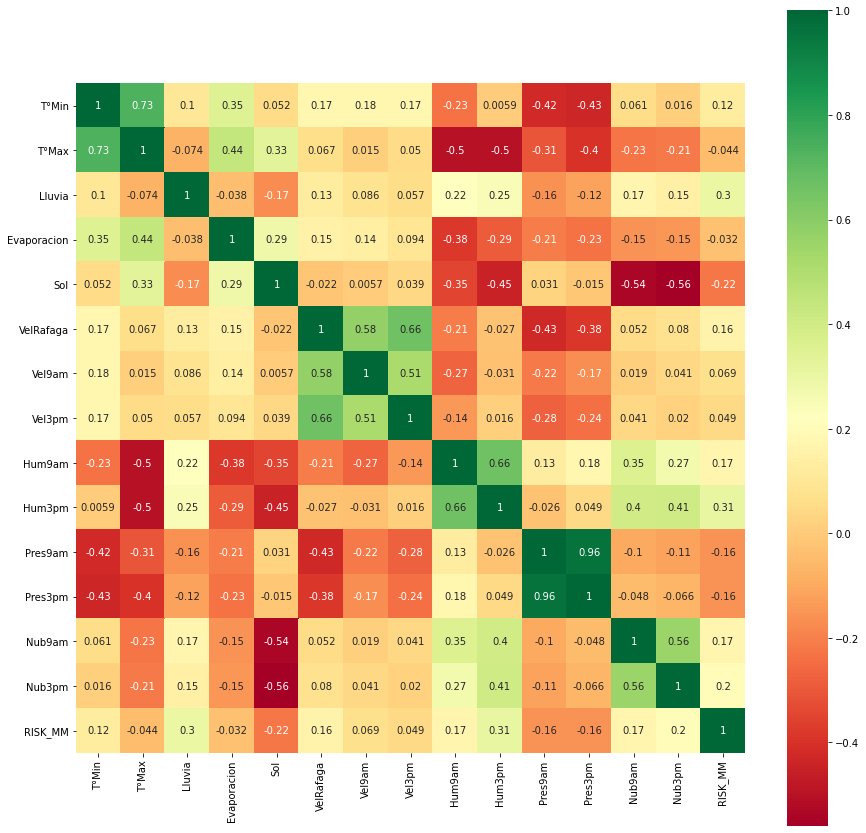

In [55]:
#Visualizamos cierta correlacion entre las variables para obtener cierto conocimiento del método Label Encoder
plt.figure(figsize=(15,15))
p=sns.heatmap(dford.corr(), annot=True,cmap='RdYlGn',square=True)

**Análisis**
>Como se puede apreciar, se pueden diferenciar cierta correlación entre las características del dataset, las cuáles podrían ser a favor de ocupar el método LabelEncoder. Dichas características con correlación positiva, mas detacable por el momento son:
>
>*  "Pres3pm" con "Pres9am" obteniendo un 96% de correlación
>*  "VelRafaga" con "Vel3pm" obteniendo un 66% de correlación 
*   "Hum9am" con "Hum3pm" obteniendo un 66% de correlación 
*   "VelRafaga" con "Vel9am" obteniendo un 58% de correlación 
*   "T°Min" con "T°Max" obtiendo un 73% de correlacion 

In [56]:
#Ejecutamos de forma automatizada la transformación de las variables categóricas
ubicacionNum = pd.DataFrame()
for feature in cobj:
  label_encoder = le()
  all_labelencoders[feature] = label_encoder
  ubicacionNum[feature + 'DefNum'] = label_encoder.fit_transform(cdobj[feature])
ubicacionNum

,FechaDefNum,UbicacionDefNum,DirRafagaDefNum,Dir9amDefNum,Dir3pmDefNum,LluviaHoyDefNum,LluviaManDefNum
0,396,2,13,13,14,0,0
1,397,2,14,6,15,0,0
2,398,2,15,13,15,0,0
3,399,2,4,9,0,0,0
4,400,2,13,1,7,0,0
...,...,...,...,...,...,...,...
142188,3430,41,0,2,0,0,0
142189,3431,41,0,9,1,0,0
142190,3432,41,6,9,3,0,0
142191,3433,41,3,9,14,0,0


In [57]:
#Implementamos las columnas UbicacionDefNum y DirRafagaDefNum al DataSet que se ocupará en adelante 

dt = {dford.columns[0] : dford['Fecha'].iloc[:], ubicacionNum.columns[0] : ubicacionNum['FechaDefNum'].iloc[:],
      dford.columns[1] : dford['Ubicacion'].iloc[:], ubicacionNum.columns[1] : ubicacionNum['UbicacionDefNum'].iloc[:],
      dford.columns[2] : dford['T°Min'].iloc[:],
      dford.columns[3] : dford['T°Max'].iloc[:], dford.columns[4] : dford['Lluvia'].iloc[:], 
      dford.columns[5] : dford['Evaporacion'].iloc[:], dford.columns[6] : dford['Sol'].iloc[:], 
      dford.columns[7] : dford['DirRafaga'].iloc[:], ubicacionNum.columns[2] : ubicacionNum['DirRafagaDefNum'].iloc[:],
      dford.columns[8] : dford['VelRafaga'].iloc[:], dford.columns[9] : dford['Dir9am'].iloc[:],
      ubicacionNum.columns[3] : ubicacionNum['Dir9amDefNum'].iloc[:], dford.columns[10] : dford['Dir3pm'].iloc[:],
      ubicacionNum.columns[4] : ubicacionNum['Dir3pmDefNum'].iloc[:],dford.columns[11] : dford['Vel9am'].iloc[:],
      dford.columns[12] : dford['Vel3pm'].iloc[:], dford.columns[13] : dford['Hum9am'].iloc[:],
      dford.columns[14] : dford['Hum3pm'].iloc[:], dford.columns[15] : dford['Pres9am'].iloc[:],
      dford.columns[16] : dford['Pres3pm'].iloc[:], dford.columns[17] : dford['Nub9am'].iloc[:], 
      dford.columns[18] : dford['Nub3pm'].iloc[:], dford.columns[19] : dford['LluviaHoy'].iloc[:], 
      ubicacionNum.columns[5] : ubicacionNum['LluviaHoyDefNum'].iloc[:],
      dford.columns[20] : dford['RISK_MM'].iloc[:], dford.columns[21] : dford['LluviaMan'].iloc[:],
      ubicacionNum.columns[6] : ubicacionNum['LluviaManDefNum'].iloc[:]}

df_lluvia = pd.DataFrame(dt, columns= [dford.columns[0], ubicacionNum.columns[0], dford.columns[1], ubicacionNum.columns[1], dford.columns[2],dford.columns[3], dford.columns[4], 
                                       dford.columns[5], dford.columns[6],dford.columns[7], dford.columns[8], dford.columns[9], ubicacionNum.columns[3], dford.columns[10],
                                       ubicacionNum.columns[4], dford.columns[11], dford.columns[12], dford.columns[13], dford.columns[14], dford.columns[15], dford.columns[16], 
                                       dford.columns[17], dford.columns[18], dford.columns[19], ubicacionNum.columns[5], dford.columns[20], dford.columns[21], ubicacionNum.columns[6]]) 
df_lluvia

,Fecha,FechaDefNum,Ubicacion,UbicacionDefNum,T°Min,T°Max,Lluvia,Evaporacion,Sol,DirRafaga,VelRafaga,Dir9am,Dir9amDefNum,Dir3pm,Dir3pmDefNum,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pres3pm,Nub9am,Nub3pm,LluviaHoy,LluviaHoyDefNum,RISK_MM,LluviaMan,LluviaManDefNum
0,2008-12-01,396,Albury,2,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,13,WNW,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,No,0,0.0,No,0
1,2008-12-02,397,Albury,2,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,6,WSW,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,No,0,0.0,No,0
2,2008-12-03,398,Albury,2,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,13,WSW,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,No,0,0.0,No,0
3,2008-12-04,399,Albury,2,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,9,E,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,No,0,1.0,No,0
4,2008-12-05,400,Albury,2,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,1,NW,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,No,0,0.2,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,3430,Uluru,41,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,2,E,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,No,0,0.0,No,0
142189,2017-06-21,3431,Uluru,41,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,9,ENE,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,No,0,0.0,No,0
142190,2017-06-22,3432,Uluru,41,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,9,N,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,No,0,0.0,No,0
142191,2017-06-23,3433,Uluru,41,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,9,WNW,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,No,0,0.0,No,0


In [58]:
#Obtenemos y guardamos las variables significativas
x = df_lluvia.iloc[:,:-2]
x

,Fecha,FechaDefNum,Ubicacion,UbicacionDefNum,T°Min,T°Max,Lluvia,Evaporacion,Sol,DirRafaga,VelRafaga,Dir9am,Dir9amDefNum,Dir3pm,Dir3pmDefNum,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pres3pm,Nub9am,Nub3pm,LluviaHoy,LluviaHoyDefNum,RISK_MM
0,2008-12-01,396,Albury,2,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,13,WNW,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,No,0,0.0
1,2008-12-02,397,Albury,2,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,6,WSW,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,No,0,0.0
2,2008-12-03,398,Albury,2,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,13,WSW,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,No,0,0.0
3,2008-12-04,399,Albury,2,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,9,E,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,No,0,1.0
4,2008-12-05,400,Albury,2,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,1,NW,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,No,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,3430,Uluru,41,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,2,E,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,No,0,0.0
142189,2017-06-21,3431,Uluru,41,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,9,ENE,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,No,0,0.0
142190,2017-06-22,3432,Uluru,41,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,9,N,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,No,0,0.0
142191,2017-06-23,3433,Uluru,41,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,9,WNW,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,No,0,0.0


In [59]:
#Obtenemos un DataSet solo con las columnas numéricas en base a los datos de la variable "x"
tiposdt = x.columns.to_frame().groupby(x.dtypes).groups
cobj2 = tiposdt[np.dtype('object')]
columnas = x.columns
cnum = list(set(columnas) - set(cobj2))
dfNumLluvia = x[cnum]
dfNumLluvia

,Pres3pm,Vel3pm,Dir9amDefNum,Hum9am,Nub9am,Vel9am,Nub3pm,RISK_MM,Sol,Hum3pm,Evaporacion,Pres9am,UbicacionDefNum,T°Max,LluviaHoyDefNum,Lluvia,T°Min,VelRafaga,Dir3pmDefNum,FechaDefNum
0,1007.1,24.0,13,71.0,8.000000,20.0,4.503167,0.0,7.624853,22.0,5.469824,1007.7,2,22.9,0,0.6,13.4,44.0,14,396
1,1007.8,22.0,6,44.0,4.437189,4.0,4.503167,0.0,7.624853,25.0,5.469824,1010.6,2,25.1,0,0.0,7.4,44.0,15,397
2,1008.7,26.0,13,38.0,4.437189,19.0,2.000000,0.0,7.624853,30.0,5.469824,1007.6,2,25.7,0,0.0,12.9,46.0,15,398
3,1012.8,9.0,9,45.0,4.437189,11.0,4.503167,1.0,7.624853,16.0,5.469824,1017.6,2,28.0,0,0.0,9.2,24.0,0,399
4,1006.0,20.0,1,82.0,7.000000,7.0,8.000000,0.2,7.624853,33.0,5.469824,1010.8,2,32.3,0,1.0,17.5,41.0,7,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,1021.2,13.0,2,59.0,4.437189,15.0,4.503167,0.0,7.624853,27.0,5.469824,1024.7,41,21.8,0,0.0,3.5,31.0,0,3430
142189,1020.3,11.0,9,51.0,4.437189,13.0,4.503167,0.0,7.624853,24.0,5.469824,1024.6,41,23.4,0,0.0,2.8,31.0,1,3431
142190,1019.1,9.0,9,56.0,4.437189,13.0,4.503167,0.0,7.624853,21.0,5.469824,1023.5,41,25.3,0,0.0,3.6,22.0,3,3432
142191,1016.8,9.0,9,53.0,4.437189,9.0,4.503167,0.0,7.624853,24.0,5.469824,1021.0,41,26.9,0,0.0,5.4,37.0,14,3433


**Análisis**

>El segundo paso es la obtención del DataSet solo con las variables o columnas numéricas en base a la variable ya definida como "x"

In [60]:
#Obtenemos y guardamos el feature o llave del Data Set
y_m = df_lluvia.iloc[:,27:28]
y_m

,LluviaManDefNum
0,0
1,0
2,0
3,0
4,0
...,...
142188,0
142189,0
142190,0
142191,0


# Fase 4 - Modelamiento


>En esta etapa dentro del modelamiento, se aplican técnicas de Data Mining a la data, con ciertas técnicas de modelado y parámetros, hasta alcanzar los valores óptimos dentro de lo que es el modelado de tales datos, en base a ciertos algoritmos.
>Los pasos se realizan mediante bloques específicos, donde en primera instancia, tenemos la obtención y el guardado de variables significativas.

## Naive Bayes

>Este es uno de los algorítmos más poderosos y simples para todo lo relacionado con clasificación, el cuál es basado en el mismo teorema de Bayes, siendo bastante útil y en específico para un gran conjunto de datos, como lo es en nuestro caso, en donde procedemos de  mas de cincuenta mil datos en la muestra.
>
>Por lo cual, para comenzar con este modelo, iniciaremos con utilizar el método SelectKBest, identificando las columnas mas relevantes del DataSet.

In [61]:
#En base al SelectKBest obtenemos las 5 columnas con mayor correlación
best=SelectKBest(k=5)
X_new = best.fit_transform(dfNumLluvia, y_m)
X_new.shape
selected = best.get_support(indices=True)
print(dfNumLluvia.columns[selected])

Index(['Nub3pm', 'RISK_MM', 'Sol', 'Hum3pm', 'LluviaHoyDefNum'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Análisis**

>De acuerdo al metodo "SelectKBest", este nos mencionará las columnas que obtienen mayor correlación de acuerdo al DataSet "defNumLluvia", dandonos como resultado las siguientes características:
>
>*   LluviaHoyDefNum
*   Sol
*   Nub3pm
*   RISK_MM
*   Hum3pm


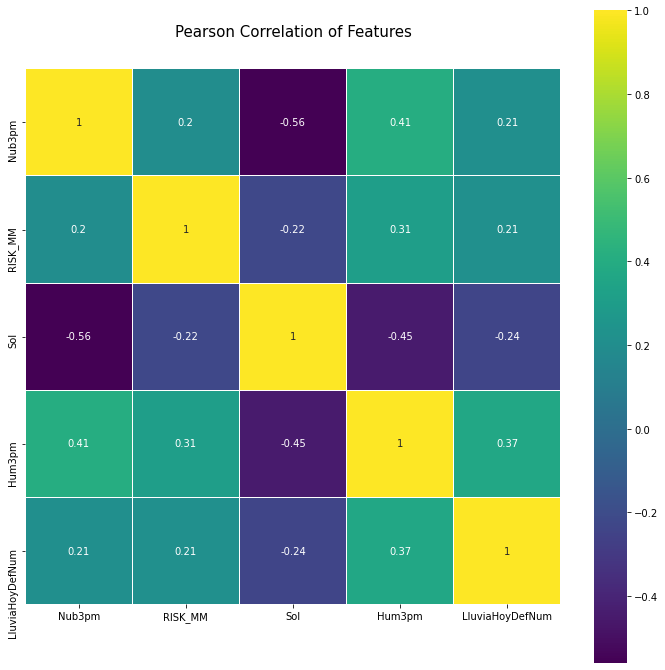

In [62]:
#En base a las columnas seleccionadas veremos la correlación entre ellas en la matriz de correlación de pearson
used_features = dfNumLluvia.columns[selected]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dfNumLluvia[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**Análisis**

>De acuerdo a la matriz de correlación los valores que presentan una "mayor" correlación entre dichas variables seleccionadas, son:
>
>*  "Sol" con "Nub3pm" (-56%)
*   "Sol" con "Hum3pm" (-45%)
>
>Por otro lado, encontramos que prevalecen las correlaciones negativas sobre las positivas, en cuanto a referirnos en que obtenemos valores más cercanos a -1, dandonos a entener que tienen una relación inversamente proporcional.



### Entrenamiento

>Generalmente para realizar este entrenamiento, necesitaremos separar el conjunto de datos, obtiendo un conjunto de datos de entrenamiento y evaluación, por lo tanto, en base al método "train_test_split" (el cuál nos asegurará obtener datos de forma aleatoria de la muestra) tendremos como resultado diversas variables para la utilización tanto de la validación como de la evaluación del modelo, así bien, esto podra verse visualizado en el siguiente bloque de código.

In [63]:
#Columnas seleccionadas almacenadas en una variable
X_nb = dfNumLluvia[used_features]
# Se separan los datos de "train" en entrenamiento y prueba para probar los algorítmos
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, df_lluvia['LluviaManDefNum'], test_size=0.2,random_state = 29)
# Instanciamos el GaussianNB(), para el trabajo del algoritmo de acuerdo a las variables del test y train
modelo_x_nb = GaussianNB()
# Entrenamiento del modelo
modelo_x_nb.fit(X_train_nb, y_train_nb)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
print("El uso de datos para entrenamiento es {}, : {}".format(X_train_nb.shape, y_train_nb.shape))
print("El uso de datos para prueba es {}, : {}".format(X_test_nb.shape, y_test_nb.shape))

El uso de datos para entrenamiento es (113754, 5), : (113754,)
El uso de datos para prueba es (28439, 5), : (28439,)


**Análisis**
>Podemos observar el tamaño del DataSet, considerando que configuramos el tamaño de las pruebas con un 20%.


###Validación

In [65]:
# Validación del modelo en base a los datos de prueba del X_test_nb
y_pred_nb = modelo_x_nb.predict(X_test_nb)
y_pred_nb

array([0, 1, 0, ..., 1, 1, 0])

**Análisis**

> Se pueden examinar los datos predichos del modelo de Bayes, los cuales comienzan con por mencionar; *No llueve*(0), *Llueve*(1) y *No llueve*(0).

###Evaluación

> En base al proceso tanto de validación como de entrenamiento de los datos, es que se han de visualizar las siguientes métricas para la evaluación de tal modelo, con el fin de ir determinando que tan acorde o ajustado podría llegar a ser tal modelo respecto al DataSet del Clima en Australia.

In [66]:
# Evaluación del modelo
matriz_x_nb = confusion_matrix(y_test_nb, y_pred_nb)
print('Matriz de Confusión:')
print(matriz_x_nb)
precision_nb = precision_score(y_test_nb, y_pred_nb)
print('Precisión del modelo:', precision_nb)

Matriz de Confusión:
[[21168   908]
 [    0  6363]]
Precisión del modelo: 0.8751203410810068


**Análisis**

> Respecto a la precision obtenida, se puede determinar que el porcentaje total de elementos clasificados correctamente es de un 88%, reflejando que es un porcentaje óptimo para modelo.
>
>También en base a la matriz de confusión, se puede observar que el total de valores que se clasificaron correctamente, es de 27.531 valores verdaderos, dejandonos con 908 valores erróneos propuestos por el modelo Naive Bayes.

In [67]:
# Obtenemos las metricas asociadas al modelo
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print('Accurancy del modelo:',accuracy_nb)
print('F1 score del modelo:',f1_score(y_test_nb, y_pred_nb))
print('Recall del modelo:',recall_score(y_test_nb, y_pred_nb))
print(classification_report(y_test_nb, y_pred_nb))

Accurancy del modelo: 0.9680720137838883
F1 score del modelo: 0.9334017896435381
Recall del modelo: 1.0
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     22076
           1       0.88      1.00      0.93      6363

    accuracy                           0.97     28439
   macro avg       0.94      0.98      0.96     28439
weighted avg       0.97      0.97      0.97     28439



**Análisis**

>*   Se obtiene que de toda la muestra catalogados como 1 (*Llueve*), un 88% de precisión corresponden en ser etiquetados como 1 (*Llueve*).
*   Se tiene que de toda la muestra de la matriz sobre el clima, predecimos un total de un 100% como dato a ser 1, diciéndonos que si lloverá mañana, por la medida Recall.
*   El promedio del recall y la precisión de la variable 0 (*No Llueve*), es un f1-score de un 98%.

##Regresion Lineal Multiple

> Este tipo de modelos de regresión, en especial este mismo, trata de ajustar modelos lineales entre la variable dependiente y las variables independientes, obtiendo diversas métricas que podrán indicarnos la representación del residuo o error, que nos mostrará las diferencias entre los valores de la variable dependiente y por otro lado, los valores que estaremos prediciendo en base a la misma recta de la regresión.
>
>Es por esto, que para comenzar asociaremos las variables encontraradas relacionadas unas con otras, con el fin de obtener las características que tendran la mayor correlación, para su posterior uso en el modelo.

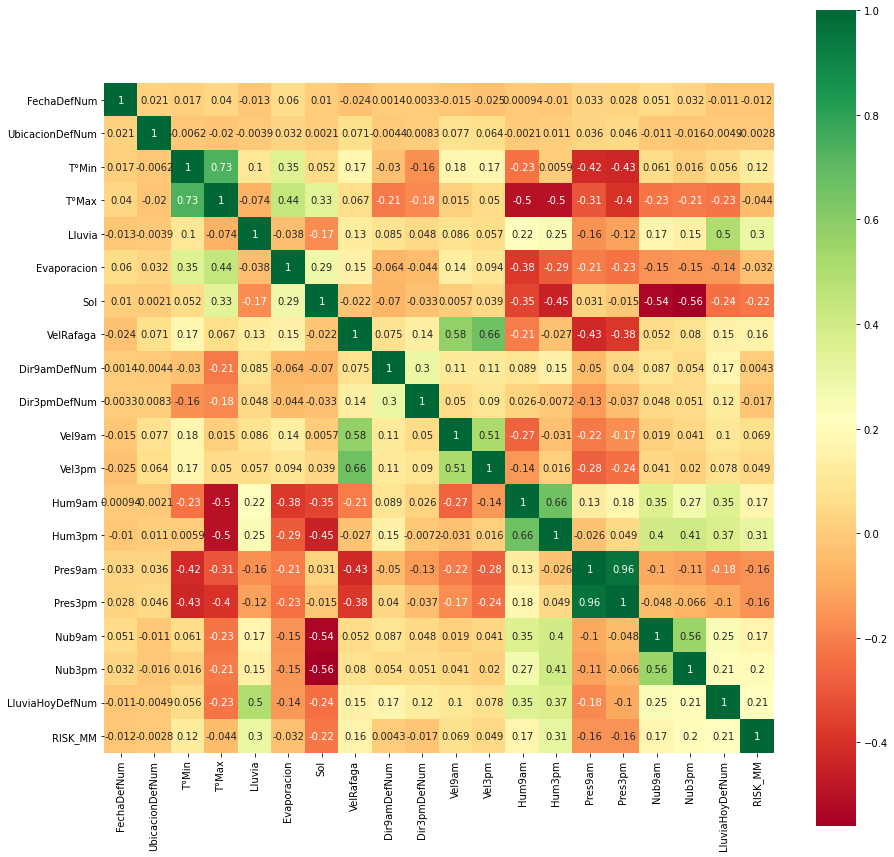

In [68]:
# Visualizamos la correlación de las variables
plt.figure(figsize=(15,15))
p=sns.heatmap(x.corr(), annot=True,cmap='RdYlGn',square=True)

**Análisis**

> Respecto a la matriz de correlacion, se pueden visualizar diversas relaciones entre las variables, pero las más destacadas que podran ser utilizadas más adelante, serán:
>
>*  "Pres3pm" con "Pres9am" obteniendo un 96% de correlación
>*  "VelRafaga" con "Vel3pm" obteniendo un 66% de correlación
*   "Hum9am" con "Hum3pm" obteniendo un 66% de correlación
*   "VelRafaga" con "Vel9am" obteniendo un 58% de correlación




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


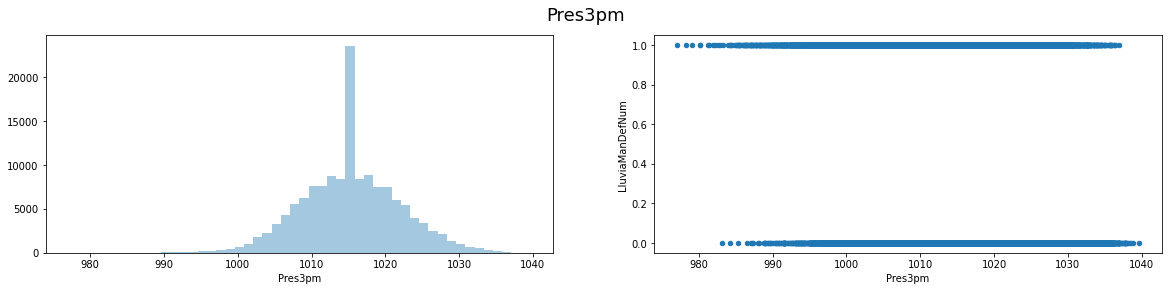

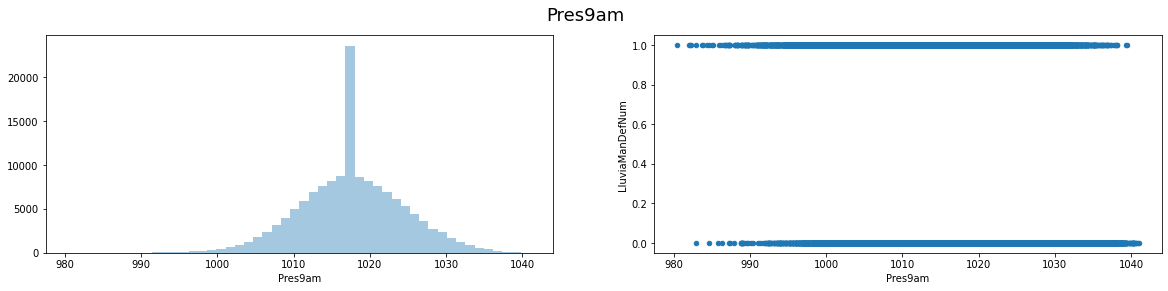

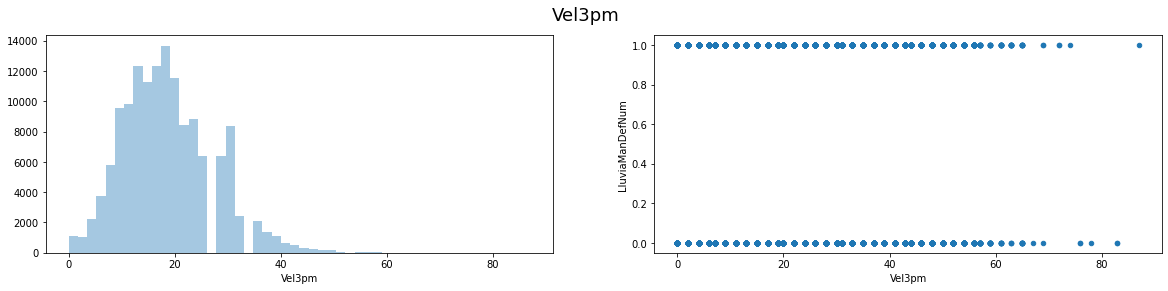

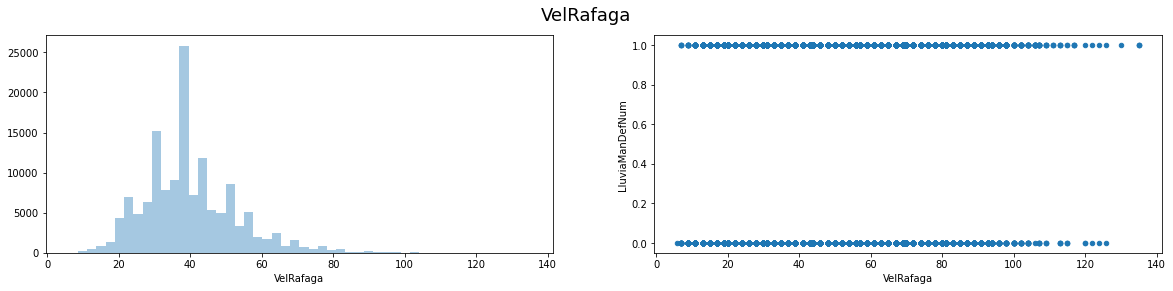

In [69]:
# Se crean graficos para visualizar tanto la dispersion (respecto a la columna LluviaManDefNum) como la distribución de los datos de cada columna
for col in ['Pres3pm', 'Pres9am', 'Vel3pm', 'VelRafaga']:
  fig, ax =plt.subplots(1, 2, figsize=(20, 4))
  fig.suptitle(col, fontsize=18)
  sns.distplot(df_lluvia[col], ax=ax[0], kde=False)
  df_lluvia[[col]+['LluviaManDefNum']].plot.scatter(x=col, y='LluviaManDefNum', ax=ax[1])
  plt.show()

**Análisis**

> De acuerdo a los gráficos vistos anteriormente, podemos destacar de cada Feature, lo siguiente:
>
>*  Se puede apreciar que la mayor concentración de datos de la columna "Pres3pm" se encuentra entre 1010 y 1020 hpa, en donde posiblemente se encuentren outliers dentre de tal concentración de datos, por tal aumento extraño que se puede apreciar dentro de ese conjunto de datos, el cuál llega a sobrepasar los 20000 datos.
*   Si bien son medidas distintas, la velocidades del viento respecto a la presión atmosférica, parece obtener unos datos mas diversos en el grafico de dispersión, dando como resultado que la velocidad del viento, puede verse más afectada para definir si puede llover o no al día siguiente.



In [70]:
# Almacenamos en una variable, las columnas seleccionadas con mayor relacion dichas por la matriz de correlación
x_rlm = df_lluvia[['Hum9am', 'Hum3pm', 'Vel3pm', 'VelRafaga']]
x_rlm

,Hum9am,Hum3pm,Vel3pm,VelRafaga
0,71.0,22.0,24.0,44.0
1,44.0,25.0,22.0,44.0
2,38.0,30.0,26.0,46.0
3,45.0,16.0,9.0,24.0
4,82.0,33.0,20.0,41.0
...,...,...,...,...
142188,59.0,27.0,13.0,31.0
142189,51.0,24.0,11.0,31.0
142190,56.0,21.0,9.0,22.0
142191,53.0,24.0,9.0,37.0


**Análisis**

> Visualizamos el nuevo DataSet con las variables seleccionadas con mayor correlación, las cuales presentan 142193 datos con las columnas en un principio nombradas como; Hum9am, Hum3pm, Vel3pm y VelRafaga.

###Entrenamiento

Generalmente para realizar este entrenamiento, necesitaremos separar el conjunto de datos, obteniendo un conjunto de datos de entrenamiento y evaluación, por lo tanto, en base al metodo "train_test_split" (el cuál nos asegurará obtener datos de forma aleatoria de la muestra) tendremos como resultado diversas variables para la utilización tanto de la validación como de la evaluación del modelo, así bien, esto podra verse visualizado en el siguiente bloque de código.

In [71]:
# Se separan las variables predictoras y la predecidas
X_train_rlm, X_test_rlm, y_train_rlm, y_test_rlm = train_test_split(x_rlm, y_m,test_size=0.2,random_state=29)

In [72]:
# Entrenamiento del modelo
modelo_rlm = LinearRegression()
modelo_rlm.fit(X_train_rlm, y_train_rlm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Validación

In [73]:
# Validación del modelo
y_pred_rlm = modelo_rlm.predict(X_test_rlm)

###Evaluación

> En base al proceso tanto de validación como de entrenamiento de los datos, es que se han de visualizar las siguientes métricas para la evaluación de tal modelo, con el fin de ir determinando que tan acorde o ajustado podría llegar a ser tal modelo respecto al DataSet del Clima en Australia. Por lo tanto, para las métricas a interpretar serán las siguientes:

In [74]:
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test_rlm, y_pred_rlm))
print("MSE: %.2f" % mean_squared_error(y_pred_rlm, y_test_rlm))
print("Score del modelo : %.2f" % modelo_rlm.score(X_train_rlm, y_train_rlm))

R2 :0.25
MSE: 0.13
Score del modelo : 0.26


**Análisis**

> Mediante estos resultados, se puede interpretar del R2 o R Cuadrado,
que presenta un 25% de variacion de las variables de respuesta. Este porcentaje quiere decir, que mientras El R2 presente este porcentaje bajo, es mas problemático cuando se desea crear predicciones.

>En base al MSE, que que se debe a un 13% se puede interpretar que estos datos están lejos del ajuste del modelo de datos, lo cual indica que no posee un porcentaje adecuado para la predicción del modelo.


##Regresion Logistica

>Otro de los modelos que utilizaremos, será la regresión logística, que es un método estadístico que sirve o trata de modelar la probabilidad de una variable cualitativa en función de una o más variables. Esto quiere decir que, es útil cuando la variable es categórica.


In [75]:
# Transferimos el DataSet a una variable que solo usara tal modelo de Regresion Logistica
x_rl = dfNumLluvia
x_rl

,Pres3pm,Vel3pm,Dir9amDefNum,Hum9am,Nub9am,Vel9am,Nub3pm,RISK_MM,Sol,Hum3pm,Evaporacion,Pres9am,UbicacionDefNum,T°Max,LluviaHoyDefNum,Lluvia,T°Min,VelRafaga,Dir3pmDefNum,FechaDefNum
0,1007.1,24.0,13,71.0,8.000000,20.0,4.503167,0.0,7.624853,22.0,5.469824,1007.7,2,22.9,0,0.6,13.4,44.0,14,396
1,1007.8,22.0,6,44.0,4.437189,4.0,4.503167,0.0,7.624853,25.0,5.469824,1010.6,2,25.1,0,0.0,7.4,44.0,15,397
2,1008.7,26.0,13,38.0,4.437189,19.0,2.000000,0.0,7.624853,30.0,5.469824,1007.6,2,25.7,0,0.0,12.9,46.0,15,398
3,1012.8,9.0,9,45.0,4.437189,11.0,4.503167,1.0,7.624853,16.0,5.469824,1017.6,2,28.0,0,0.0,9.2,24.0,0,399
4,1006.0,20.0,1,82.0,7.000000,7.0,8.000000,0.2,7.624853,33.0,5.469824,1010.8,2,32.3,0,1.0,17.5,41.0,7,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,1021.2,13.0,2,59.0,4.437189,15.0,4.503167,0.0,7.624853,27.0,5.469824,1024.7,41,21.8,0,0.0,3.5,31.0,0,3430
142189,1020.3,11.0,9,51.0,4.437189,13.0,4.503167,0.0,7.624853,24.0,5.469824,1024.6,41,23.4,0,0.0,2.8,31.0,1,3431
142190,1019.1,9.0,9,56.0,4.437189,13.0,4.503167,0.0,7.624853,21.0,5.469824,1023.5,41,25.3,0,0.0,3.6,22.0,3,3432
142191,1016.8,9.0,9,53.0,4.437189,9.0,4.503167,0.0,7.624853,24.0,5.469824,1021.0,41,26.9,0,0.0,5.4,37.0,14,3433


### Entrenamiento

> Para comenzar a hacer este entrenamiento, al igual que en varios de los modelos propuestos, necesitaremos separar el conjunto de datos, por lo tanto es que en base a tener como resultado un conjunto de datos de entrenamiento y evaluación, en donde en origen al método "train_test_split" (el cuál nos asegurará obtener datos de forma aleatoria de la muestra) tendremos de igual forma diversas variables para la validación como de la evaluación del modelo, es por esto, que lo mencionado podra verse visualizado en el siguiente bloque de código.

In [76]:
# Utilizamos el train_test_split para generar las variables que seran utilizadas en el proceso de predicción
Xtrain_rl, Xtest_rl, Ytrain_rl, Ytest_rl = train_test_split(x_rl,y_m,test_size=0.2)

**Análisis**

> Se puede apreciar un tamaño de test de un 20%, el cual podria ser modificado en un futuro para intentar obtener mejores resultados.

In [77]:
# En base a la instancia del modelo de regresion logistica, realizamos en entrenamiento del modelo
mo1 = LogisticRegression(solver='lbfgs')
mo1.fit(Xtrain_rl, Ytrain_rl)
Yhat_rl = mo1.predict(Xtest_rl)
Yprob = mo1.predict_proba(Xtest_rl)
print(classification_report(Ytest_rl, Yhat_rl))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22068
           1       0.92      0.87      0.90      6371

    accuracy                           0.95     28439
   macro avg       0.94      0.92      0.93     28439
weighted avg       0.95      0.95      0.95     28439



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Análisis**
> En base al metodo de clasificacion de reportes, es que hemos obtenido una cierta comparación de los valores predichos con respecto la muestra destinada al "Ytest_rl", por lo cual se interpretó lo siguiente:
>
>*   Se obtiene que de toda la muestra sobre si lloviera (Yes), un 95% de precision corresponden en ser etiquetados como *Yes*.
*   Se tiene que de toda la muestra de la matriz sobre el clima en Australia, predecimos un total de un 89% como dato a ser *Yes*, por la medida Recall.
*   El promedio del recall y la precision de la variable "No", es un f1-score de un 98%.


###Sintonizacion del Modelo

In [78]:
# Instanciamos el modelo de regresion logistica y utilizamos el Grid para busqueda exhaustiva de valores
model_rl = LogisticRegression()

params_rl = {"max_iter": [20],
          "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
         }
grid_rl = GridSearchCV(estimator=model_rl, param_grid=params_rl,cv=5,scoring='accuracy')
grid_rl.fit(Xtrain_rl, Ytrain_rl,)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: Da

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [20],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

###Evaluación

>En base al proceso tanto de validación como de entrenamiento de los datos, es que se han de visualizar las siguientes métricas y procesos para la evaluación de tal modelo, con el fin de ir determinando que tan acorde o ajustado podria llegar a ser tal modelo respecto al DataSet del Clima en Australia.

In [79]:
# Obtenemos las puntuaciónes media validada de forma cruzada y los mejores parámetros para el modelo
print(grid_rl.best_score_)
print(grid_rl.best_params_)

0.9543575899815536
{'max_iter': 20, 'solver': 'liblinear'}


**Análisis**

> En base a esta ejecución, se muestra e imprimen los mejores totales y parámetros, gracias a la librería "liblinear", lo que da un porcentaje de 95% de puntuación, lo que indica que se puede determinar una alta probabilidad de precisión en base a resultados del DataSet o Modelo de Australia

In [80]:
# Obtenemos los resultados del grid_rl con las mejores configuraciones del parámetro candidato.
pd.DataFrame(grid_rl.cv_results_).iloc[grid_rl.best_index_]

mean_fit_time                                        1.20038
std_fit_time                                       0.0959746
mean_score_time                                   0.00814619
std_score_time                                   0.000668864
param_max_iter                                            20
param_solver                                       liblinear
params               {'max_iter': 20, 'solver': 'liblinear'}
split0_test_score                                   0.973891
split1_test_score                                   0.941981
split2_test_score                                   0.929542
split3_test_score                                   0.978726
split4_test_score                                   0.947648
mean_test_score                                     0.954358
std_test_score                                     0.0189179
rank_test_score                                            1
Name: 2, dtype: object

**Análisis** 

> Respecto a los resultados salientes sobre tal dictado de claves el cuál fue importado en un DataFrame, podemos ver ciertos valores, de los cuales algunos a resaltar podrán ser:
>
>*  param_max_iter: Este nos menciona el máximo de iteración que realizará el modelo en base a los parámetros ingresado, el cual demuestra ser de unas 20 iteraciones
*   std_test_score: la puntuacion del 1% nos indicará la cantidad de desviaciones estándar que hay de distancia de un valor de la media.
*   param_solver: utilizá una biblioteca llamada "liblinear", lo cuál significa que permite imprimir los mejores totales y parámetros.
*   mean_score_time: obtenemos un 9% sobre la cantidad media de tiempo de todos los cs-folds que se encontraran en cada conjunto de parámetros que fueron definidos.
*   std_fit_time: El resultado obtenido, es de un 0.4% el cual nos menciona sobre el ajuste del entrenamiento del modelo en cuanto que tan preciso podría llegar a ser para posteriores predicciones.




In [81]:
# Obtencion de métricas en base a utilizado grid_rl
Yhat_rl = grid_rl.predict(Xtest_rl)
Yprob_rl = grid_rl.predict_proba(Xtest_rl)
print(classification_report(Ytest_rl, Yhat_rl))
precision_rl = precision_score(Ytest_rl, Yhat_rl)
print('Precisión del modelo:', precision_rl)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     22068
           1       0.97      0.72      0.83      6371

    accuracy                           0.93     28439
   macro avg       0.95      0.86      0.89     28439
weighted avg       0.93      0.93      0.93     28439

Precisión del modelo: 0.9696905468418822


**Análisis**

> En base al metodo de clasificación de reportes y en comparación a las métricas obtenidas anteriormente, es que hemos obtenido una cierta comparación de los valores predichos con respecto a la muestra destinada al "Ytest_rl", por lo cual se interpreto lo siguiente:
>
>*   Se obtiene que de toda la muestra sobre si no lloviera (No), obtenemos un 3% menos de precisión quedando en un 94% en comparación a antes, los cuales corresponden en ser etiquetados como *No*.
*   Se tiene que de toda la muestra de la matriz sobre el clima en Australia, predecimos un total de un 77%, por lo cual decendimos un 12% aproximadamente respecto a antes, en obtener como dato a ser *Yes*, por la medida Recall.
*   El promedio del recall y la precisión de la variable "No", es un f1-score de un 97%, disminuyendo solo un 1%.

##Arbol de Decision

> El árbol de decisión es un "mapa" el cual en base a posibles resultados de un serie decisiones relacionadas, permite que una compañía o bien un individuo comparen posibles acciones entre sí, como pueden ser; costos, beneficios y probabilidades.
>
>Este está compuesto por un nodo interno representado por atributos, en donde podremos encontrar ramas las cuales significan una regla de decisión, resultando en que cada hoja representa el resultado. Asi bien, existen ciertos procesos de mejoramiento al modelo, como lo pueden ser el "Podado del árbol (pruning)" el cuál se centra en identificar la mejor profundidad posible, consiguiendo reducir la varianza y aumentar la propia posibilidad predictiva del Arbol de Decisión.
>
>Por consecuencia, hemos de integrar a nuestro proceso de Modelamiento dicho modelo, con el fin de visualizar que los resultados que podríamos obtener con dicho modelo de predicción.



In [82]:
# Pasamos el DataSet numérico a una variable ocupada unicamente por tal modelo
x_ad = dfNumLluvia

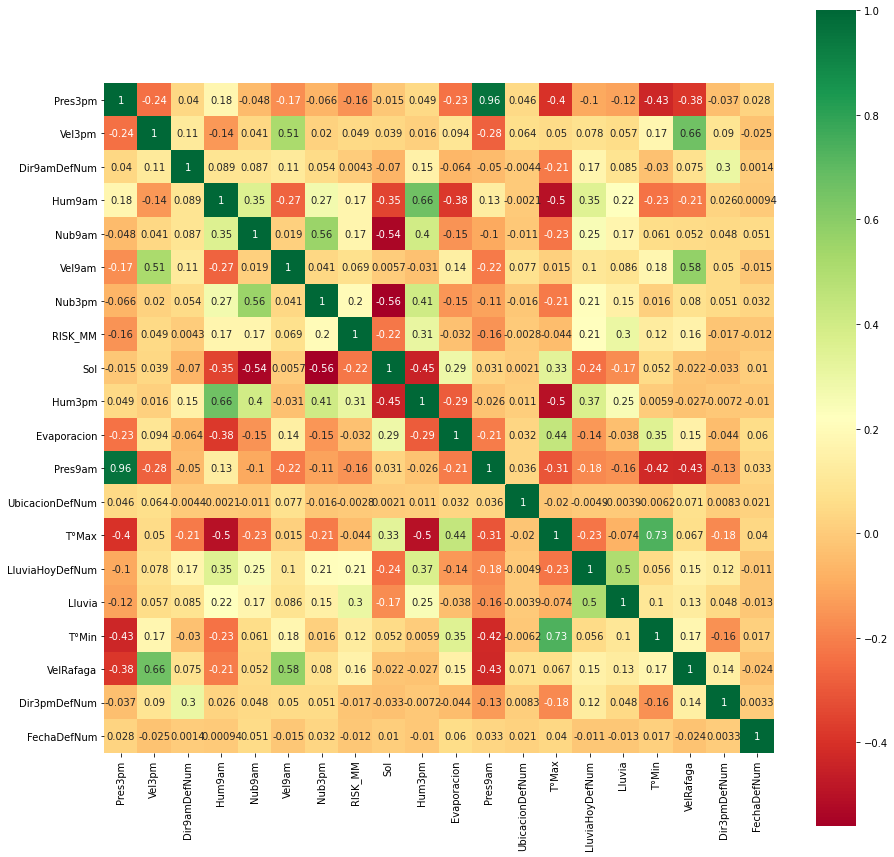

In [83]:
# Figuramos dicha relación de las variables en el dataset en base a la matriz de correlación
plt.figure(figsize=(15,15))
p=sns.heatmap(x_ad.corr(), annot=True,cmap='RdYlGn',square=True)

**Análisis**

> Respecto a la matriz de correlación, se pueden visualizar diversas relaciones entre las variables, pero las más destacadas que podran ser utilizadas mas adelante, serán:
>
>*  "Pres3pm" con "Pres9am" obteniendo un 96% de correlación
>*  "VelRafaga" con "Vel3pm" obteniendo un 66% de correlación
*   "Hum9am" con "Hum3pm" obteniendo un 66% de correlación
*   "VelRafaga" con "Vel9am" obteniendo un 58% de correlación

In [84]:
# Almacenamos las columnas con mayor relación en una variable como un DataFrame
X_ad = dfNumLluvia[['Vel3pm','VelRafaga','Hum3pm', 'Hum9am','Pres3pm','Pres9am']]
X_ad

,Vel3pm,VelRafaga,Hum3pm,Hum9am,Pres3pm,Pres9am
0,24.0,44.0,22.0,71.0,1007.1,1007.7
1,22.0,44.0,25.0,44.0,1007.8,1010.6
2,26.0,46.0,30.0,38.0,1008.7,1007.6
3,9.0,24.0,16.0,45.0,1012.8,1017.6
4,20.0,41.0,33.0,82.0,1006.0,1010.8
...,...,...,...,...,...,...
142188,13.0,31.0,27.0,59.0,1021.2,1024.7
142189,11.0,31.0,24.0,51.0,1020.3,1024.6
142190,9.0,22.0,21.0,56.0,1019.1,1023.5
142191,9.0,37.0,24.0,53.0,1016.8,1021.0


###Entrenamiento

> Generalmente para realizar este entrenamiento, al igual que en varios de los modelos propuestos, necesitaremos separar el conjunto de datos, teniendo como resultado un conjunto de datos de entrenamiento y evaluación, en donde en base al método "train_test_split" (el cuál nos asegurará obtener datos de forma aleatoria de la muestra) tendremos como resultado diversas variables para la utilización tanto de la validación como de la evaluación del modelo, de acuerdo a esto, este podra verse visualizado en el siguiente bloque de código.

In [85]:
# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_m, test_size=0.2,random_state = 30)
modelo_ad = DecisionTreeRegressor(max_depth = 6, random_state = 29)

**Análisis**
> El proceso del train_test_split se compensa con un 20% de los datos de la muestra dedicados para la prueba, y un valor de 30 en el parámetro llamado como "random_state" el cual controla la mezcla aplicada a tales datos antes de aplicar la división.

In [86]:
# Entrenamiento del modelo
modelo_ad.fit(X_train_ad, y_train_ad)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=29, splitter='best')

**Análisis**

> De acuerdo al entrenamiento realizado, es que obtenemos como resultado, ciertos hiperparámetros de los cuales nos mencionarán el valor que poseen para poder configurar el próximo resultado a ser evaluado, es por esto que algunos de los hiperparámetros obtenidos son:
>
>*  min_samples_leaf: Encargado de revisar una posible división dando como resultado un elemento secundario con menos muestras, y un nodo seria reemplazado por hojas. Este de forma por defecto toma el valor "1".
*   min_samples_split: Este evaluará el número de muestras en el nodo, dando como resultado si el numero es menor que tal mínimo, se estaría evitando una posible división.
*   criterion: Es una función para medir la calidad de la división, admitiendo métricas como; el error cuadrático medio, el MSE y el MAE, su valor por defecto recae en el "friedman_mse", el cual proporciona una mejor aproximación en algunos casos.
*   random_state: Este inicializa el generador interno de números aleatorios, sera el encargado de determinar la división de los mismos datos en indices del train y test en tal caso.



###Validación

In [87]:
# Validación del modelo
Y_pred_ad = modelo_ad.predict(X_test_ad)

###Evalución

>En base al proceso tanto de validación como de entrenamiento de los datos propuesto con mayor correlación, es que se han de visualizar las siguientes métricas para la evaluación de tal modelo, con el fin de ir decidiendo que tan acorde o ajustado podría llegar a ser tal modelo respecto al DataSet del Clima en Australia. Por lo tanto, para las métricas a interpretar serán las siguientes:

In [88]:
# Evaluación del modelo

mse = mean_squared_error(y_test_ad, Y_pred_ad)
mae = mean_absolute_error(y_test_ad, Y_pred_ad)
R2 = r2_score(y_test_ad, Y_pred_ad)

print('Precisión del modelo (en entrenamiento):', modelo_ad.score(X_train_ad,y_train_ad))
print('Precisión del modelo (en validación):', modelo_ad.score(X_test_ad, y_test_ad))

print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)
print("R^2: %.2f" % R2)

Precisión del modelo (en entrenamiento): 0.3154415869286883
Precisión del modelo (en validación): 0.3019400706918153
MSE: 0.12
MAE: 0.24
R^2: 0.30


**Análisis**

> De a la precision obtenida, tanto del modelo en entrenamiento como en validación, podremos medir la calidad de tales modelos, es por esto que en base a los valores obtenidos, lo interpretaremos de la siguiente forma:
>
>*  Precisión del modelo (en entrenamiento) es de un 31%, lo que significa que de acuerdo al entrenamiento realizado, tanto de la data propuesta para el train, como lo sera de la "llave" establecida para el modelo, es que obtenemos una calidad bastante pobre y produciendo *underfitting*, o bien lo que se puede llegar a llamar una falta de entrenamiento del modelo.
*   Precisión del modelo (en validación) es de un 30%: un porcentaje no muy diferente al anterior, en donde este significa que de acuerdo a la validación realizada, tanto de la data propuesta para el test, como lo sera de la "llave" establecida para el modelo, es que obtenemos una calidad bastante pobre y produciendo de igual forma *underfitting*, o bien lo que se traduce en una falta de entrenamiento del modelo.
>
>También por otro lado, se pueden diferir las siguientes métricas:
>*   La precisión del modelo dentro de un entorno de entrenamiento corresponde a un  31,5%
>*   La precisión del modelo dentro de un entorno de validación corresponde a un 30,1%
>*   MSE (Error cuadrático medio). El porcentaje de el ajuste absoluto al modelo de datos, es decir, cuán cerca están los puntos de datos observados de los valores predichos del modelo, corresponde a un 12%.
*    MAE (Error Absoluto medio) El promedio de la diferencia absoluta entre los valores observados y los valores predichos corresponde a un 24%.
*    R2 El porcentaje asociado a R2 es de un 30%, lo que indica que en su mayoría, no se adapta o no mejora la predicción del modelo de datos.




Profundidad del árbol: 6
Número de nodos terminales: 64


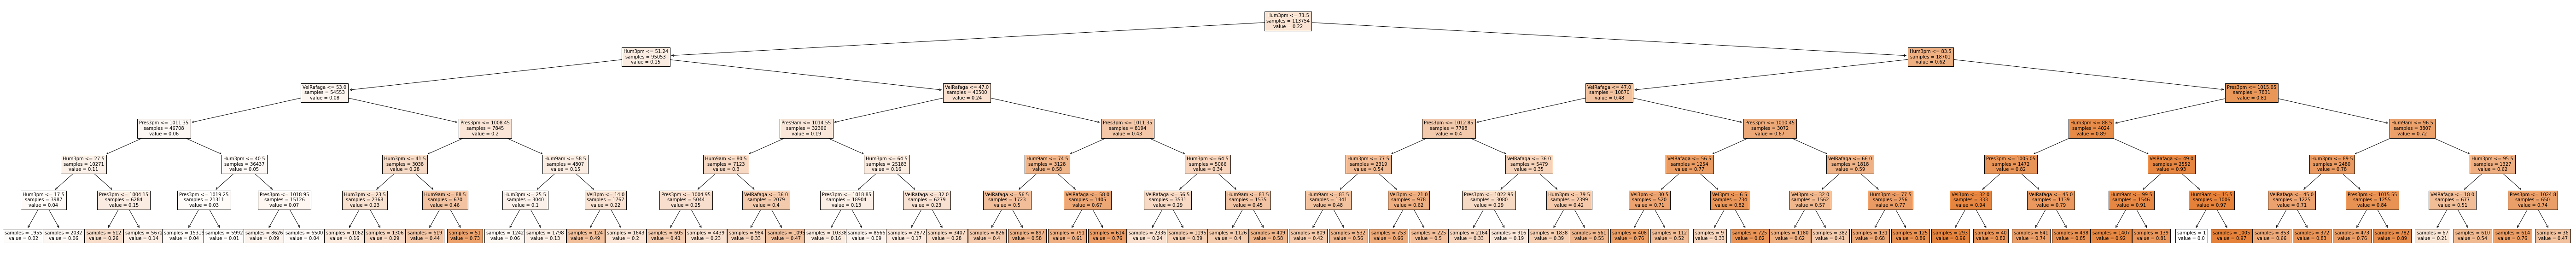

In [89]:
# Creacion y visualizacion del modelo de Arbol de Decisión
fig, ax = plt.subplots(figsize=(100, 10))
print(f"Profundidad del árbol: {modelo_ad.get_depth()}")
print(f"Número de nodos terminales: {modelo_ad.get_n_leaves()}")
plot = plot_tree(
  decision_tree = modelo_ad,
  feature_names = X_ad.columns,
  class_names = 'LluviaManDefNum',
  filled = True,
  impurity = False,
  fontsize = 10,
  precision = 2,
  ax = ax
  )

**Análisis**

> Según el modelo representado, en el árbol de decisión, se van generando nodos o ramas que determinan las diferentes categorías o variables, los "samples" que básicamente son un número de muestras que satisfacen las condiciones necesarias para llegar al nodo y los values que son cuántas muestras de cada clase o variable llegan al nodo. Con esto, el árbol de decisión va creando ramas que ayudan a definir o mejorar la precisión del modelo, y finalmente llegan a las hojas o números de nodos terminales (los cuales son de 64 nodos en tal modelo) donde se puede diferir lo siguiente en base a los datos:
>
>*   El nodo centrado en la variable Hum3pm, presenta un gran "value" para sus demas hojas y/o nodos terminales, siendo este de un 89%.
*   El nodo centrado en la variable Hum9am, presenta otro gran "value" para sus demas hojas y/o nodos terminales, siendo este de un 72%.




##Comparación de Modelos Supervisados

>Como se ha visto, hemos integrado cuatro modelos a todo nuestro trabajo sobre el dataset del Clima en Australia, dentro de ellos vemos de dos tipos, de los cuales podemos encontrar los siguientes modelos a categorizar:
>
>*   Clasificación: Regresión Logistica y Naive Bayes
*   Regresión: Regresión Lineal Multiple y Arbol de Decisión
>
>Es por esto, esque debido a la diferente del uso de estos dos tipos de modelos, es que hemos de realizar una comparacion entre ciertas metricas de los modelos, con tal de determinar en un cierto punto sobre cual modelo podria ser el mas indicado para nuestro DataSet.





In [90]:
print("Precisión del Modelo de Naive Bayes")
print("-> %.2f" % precision_nb)
print("Precision del Modelo de Regresión Logistica")
print("-> %.2f" % precision_rl)
print("Precisión del Modelo de Regresión Lineal Multiple")
print("-> %.2f" % modelo_rlm.score(X_train_rlm, y_train_rlm))
print("Precision del Modelo de Arbol de Decisión")
print("-> %.2f" % modelo_ad.score(X_test_ad, y_test_ad))

Precisión del Modelo de Naive Bayes
-> 0.88
Precision del Modelo de Regresión Logistica
-> 0.97
Precisión del Modelo de Regresión Lineal Multiple
-> 0.26
Precision del Modelo de Arbol de Decisión
-> 0.30


**Análisis**

>De acuerdo a lo visualizado anteriormente, estos fueron clasificados por modelo de regresión y clasificacion, y si bien todos poseen un porcentaje de precisión, podemos dar una conclusion bastante clara (por el momento) que en base a esta unica metrica, los modelos de clasificacion presentan un mejor "ajuste" al DataSet planteado, sin embargo el modelo que se destacara sera el de Naive Bayes el cual presenta un 88% de precisión encontrandose en un porcentaje mucho mas adecuado. Por otro lado, sobre el modelo de regresión logistica existen ciertas dudas sobre su porcentaje, ya que obteniendo un 99% de precisión nos podria indicar que este esta acercandose a presentar el fenomeno llamado Overfitting, el cual nos menciona que el modelo podria estarse aprendiendo la forma de encontrar los resultados y posteriormente "predecirlos".

>También podemos apreciar que los modelos de regresión (Arbol de Decisión y Regresion Lineal Multiple) poseen un valor bastante bajo, lo cual puede deberse a la falta de entrenamiento llamado "Underfitting", lo cual es traducido en configurar de mejor forma los hiperparámetros o simplemente como se comento anteriormente, los modelos no son los mejores para "ajustarse" al DataSet.

## K-Means

> Anteriormente se ha trabajado y modelado con Algoritmos de Aprendizaje Supervisado, lo cual reside en ocupar un "Target" o Feature Clave que se utiliza para determinar la respuesta que necesitemos ser predicha por el modelo. En esta ocasión hemos tomado la decisión de aplicar un Algoritmo de Aprendizaje No Supervisado, llamado K-Means, el cual mediante grupos basados en las características que determinemos, sin la necesidad de obtener una "Etiqueta" nos servirá tanto para encontrar grupos ocultos, segmentar por comportamiento, categorizar, detectar anomalías, entre otros usos.
>
> Cabe recalcar, que si bien nuestro data set incluye una "Etiqueta" dentro de los Features que podamos encontrar, es que en base a la conclusión anterior, se determino con que los mejores modelos eran los definidos por tipo Clustering, los cuales por tal tipo hacen relación con K-Means, asi bien, comenzamos por aplicar este modelo en base a ciertas etapas a analizar.


###Aplicación

> Como etapa inicial generaremos un grafico en 3D, el cual agrupará mediante las filas recorridas por la variable que se asigno en puntos de colores recorridos y determinados. 

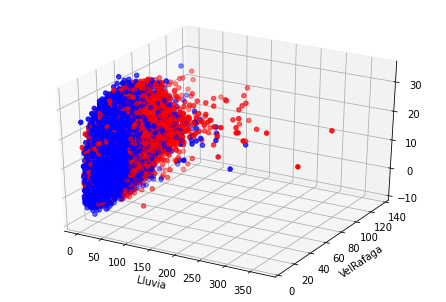

In [91]:
x_k = np.array(dfNumLluvia[["Lluvia","VelRafaga","T°Min"]])
y_k = y_m['LluviaManDefNum']
fig = plt.figure()
ax = Axes3D(fig)
colores= ['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
# NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1.
asignar=[]

for row in y_k:
  asignar.append(colores[row])

plt.xlabel("Lluvia")
plt.ylabel("VelRafaga")
ax.scatter(x_k[:, 0], x_k[:, 1], x_k[:, 2], c=asignar,s=20)
plt.show()

**Análisis**

In [92]:
#Generacion de cluster definidos por un rango determinado
num_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]
kmeans
score = [kmeans[i].fit(x_k).score(x_k) for i in range(len(kmeans))]
score

[-40453510.10612546,
 -25317500.334631577,
 -19959815.298360284,
 -15150057.88426556,
 -13046813.694293713,
 -11247374.237682441,
 -9613247.938141633,
 -8651062.004919186,
 -7986053.004354811,
 -7360604.898541231,
 -6796312.425862784,
 -6354281.817786987,
 -6011334.146493622,
 -5635791.461511102,
 -5314455.998276513,
 -5037229.391941674,
 -4803136.694836195,
 -4635557.658477317,
 -4424067.022870464]

**Análisis**
> Se pueden observar los diversos cluster que se realizaron en base a los 19 valores negativos resultantes. Dichos valores fueron de una forma un poco mas específica, las puntuaciones del entrenamiento del modelo K-Means, que dividio los datos respecto de las columnas "Lluvia","VelRafaga","T°Min" en 19 grupos. Estos serviáan para un posterior uso en la gráfica Elbow Curve.


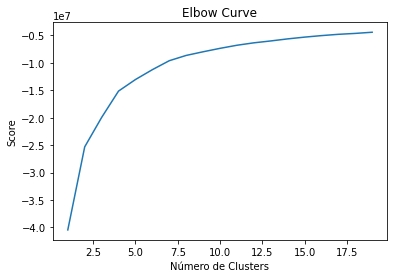

In [93]:
#En base a los cluster anteriores se realizo el siguiente gráfico de "Elbow Curve"
plt.plot(num_clusters,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**Interpretación**
>
>Mediante la representación de el gráfico de elbow, se puede diferir lo siguiente:
>* Mientras más clusters se agreguen, la curva tiende a mejorar, lo que indica que 5 es un buen número para K, sin embargo esto no determina que si agregamos 100 cluster (por ejemplo) podamos obtener un mejor rendimiento, simplemente sera de utilidad para definir la cantidad de cluster óptima de acuerdo al cambio "no brusco" que comienza a realizar la gráfica. 

###Ejecución

> Ya obtenida una previsualizacion de los Features que definiremos en el modelo K-Means como tal, es que se inciará con la ejecución del mismo, visualizando clusters y los centroides de estos mismos.

In [94]:
#Determinamos la cantidad de cluster para los datos que seran entrenados por el Modelo K-Means y obtenemos los Centroides
kmeans = KMeans(n_clusters=5).fit(x_k)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.40441379 37.90015645 14.07917914]
 [ 3.53505336 72.05547086 12.48113381]
 [ 0.88967657 26.16245545  7.82696352]
 [51.16339286 46.44345238 16.66351871]
 [ 1.91643568 51.84094828 13.25725772]]


**Análisis**
> Se visualizan los diversos centroides obtenidos de acuerdo a los cluster definidos y en base a las columnas definidas para los ejes x ("Lluvia"), y("VelRafaga"), z("T°Min"). Si bien estos valores representan una posición en el plano, estos serán mas representativos en cuanto sean vistos en un gráfico para evitar la complejidad de su visualización. 


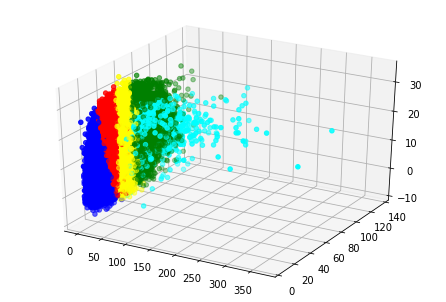

In [95]:
#Prediciendo los cluster
labels = kmeans.predict(x_k)
#Obteniendo los centroides de los cluster
C = kmeans.cluster_centers_
#Determinamos 5 colores porque k = 5
colores=['red','green','blue','cyan','yellow']#,'orange','black','pink']
asignar=[]
for row in labels:
  asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_k[:, 0], x_k[:, 1], x_k[:, 2], c=asignar,s=20)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

**Análisis**
>Es posible ver que el algoritmo de K-Means con un K=5 ha agrupado en base a 1000 datos del Dataset, teniendo en cuenta tres dimensiones claves, las cuales son: Lluvia, Velocidad de ráfaga y la temperatura mínima.

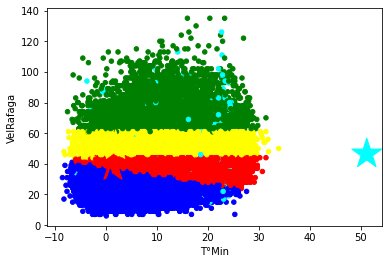

In [96]:
# Getting the values and plotting it T°Max","T°Min"
f1 = dfNumLluvia['T°Min'].values
f2 = dfNumLluvia['VelRafaga'].values
plt.scatter(f1, f2, c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("T°Min")
plt.ylabel("VelRafaga")
plt.show()

**Análisis**
> Se puede apreciar que el centroide se encuentra en una posicion bastante alejada de la muestra para ser coincidido con el conjunto de datos del cluster de tono cyan, en donde podria ser influyente los datos datos anomalos que se encuentras. 
>
> Por otro lado, se podria definir que las columnas T°Min y Lluvia, no presentan una relación muy directa o marcada, ya que los datos no muestran una tendencia a un conjunto de datos muy "normal".

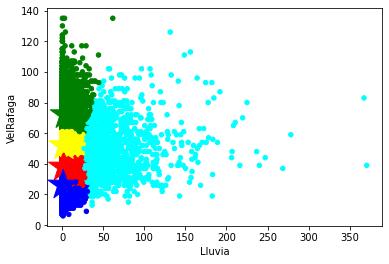

In [97]:
# Getting the values and plotting it T°Max","T°Min"
f1 = dfNumLluvia['Lluvia'].values
f2 = dfNumLluvia['VelRafaga'].values
plt.scatter(f1, f2, c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Lluvia")
plt.ylabel("VelRafaga")
plt.show()

**Analisis**
> Se puede observar que el cluster "Cyan" presenta una gran cantidad de datos anómalos, los cuales el modelo K-Means puede sacar provecho de estos. Por otro lado, esto nos indica también que de la lluvia registrada en el día, no depende la velocidad de las rafagas de viento, por consecuencia a esto, es que la velocidad de las rafagas de viento llegan a un límite de 100 km/hr en el grupo "Cyan" aproximadamente. 
>
>De acuerdo a esto, que probablemente otros clusters puedan obtener una mejora relación u otra visión sobre el aumento o disminución de los valores de estas variables.

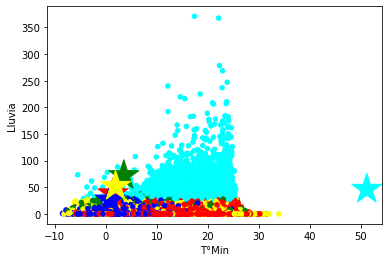

In [98]:
# Getting the values and plotting it T°Max","T°Min"
f1 = dfNumLluvia['T°Min'].values
f2 = dfNumLluvia['Lluvia'].values
plt.scatter(f1, f2, c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("T°Min")
plt.ylabel("Lluvia")
plt.show()

**Análisis**

> Se puede observar que la mayor cantidad de lluvia registrada esta entre las T° Minimas de 15° y 25° Celsius para el grupo "Cyan", obteniendo un centroide bastante alejado de la muestra establecida.
>
> Por otro lado, se pueden observar los demas centroides (blue, red, yellow, green) los cuales se encuentran en una posición bastante cercada en una temperatura mínima de alrededor de 4 °C.

In [99]:
#Cantidad de datos por conjuntos definidos por cada color marcado
cp_df_k = pd.DataFrame()
cp_df_k['Ubicacion']=dfNumLluvia['UbicacionDefNum'].values
cp_df_k['T_LlueviaSi-No']=y_m['LluviaManDefNum'].values
cp_df_k['label'] = labels;
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=cp_df_k.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,63278
1,green,8527
2,blue,37869
3,cyan,2363
4,yellow,30156


**Análisis**

> Se observa la cantidad de puntos o datos por cada cluster definido por su color, en donde la mayor cantidad se encuentra en el color red con 62820 puntos, referenciado a la clasificación de obtener una temperatura mínima mayormente alta conllevando inferir a no obtener una gran cantidad de lluvia registrada ese día.

###Evaluación

In [100]:
 # Se busca el representante del grupo, la medicion del tiempo de cierta ubicacion en Australia cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, x_k)
closest

array([26554, 90210, 96636, 32297, 33111])

**Análisis**

> Los valores vistos anteriormente, corresponden a los representantes del grupo del cluster al cual pertenecen, si bien esto es un algo abstracto, ya que necesitariamos de visualizarlo en el plano, no esta mal analizarlo de forma de conocer ciertos puntos que de igual forma podran estar cercano a su centroide. De tal manera, es que los valores corresponderan a los siguientes centroides de tales clusters:
>
>*  Red: 21985
*   Green: 121755
*   Blue: 90210
*   Cyan: 32297
*   Yellow: 33111

In [101]:
users=df_lluvia['Ubicacion'].values
for row in closest:
  print(df_lluvia.iloc[row])
  print("******************************************************")

Fecha              2009-01-09
FechaDefNum               435
Ubicacion            Richmond
UbicacionDefNum            34
T°Min                    14.2
T°Max                    21.2
Lluvia                    1.4
Evaporacion                24
Sol                   7.62485
DirRafaga                   E
VelRafaga                  37
Dir9am                    SSW
Dir9amDefNum               11
Dir3pm                      E
Dir3pmDefNum                0
Vel9am                     17
Vel3pm                     13
Hum9am                68.8438
Hum3pm                51.4826
Pres9am                1020.3
Pres3pm                1018.5
Nub9am                4.43719
Nub3pm                4.50317
LluviaHoy                 Yes
LluviaHoyDefNum             1
RISK_MM                     0
LluviaMan                  No
LluviaManDefNum             0
Name: 26554, dtype: object
******************************************************
Fecha              2015-09-18
FechaDefNum              2789
Ubicacion         

**Análisis**

> La información mostrada es la asociada al conjunto de datos del identificador llamado "closest", el cual muestra ciertos valores unicos que seran los mas cercanos al centroide de su cluster. Esto visualiza la información relacionada con tales ID en particular.

In [102]:
X_new = np.array([[1.4,39,14.2]]) # "Lluvia","VelRafaga","T°Min"
new_labels = kmeans.predict(X_new)
print(new_labels)


[0]


**Análisis**

> El valor predicho, de acuerdo a los valores que se le indicaron (1.4, 39, 14.2) sobre cada Feature ("Lluvia","VelRafaga","T°Min"), nos llevo a obtener el valor "0", el cual pertenece al cluster "Red", este pertenece a los datos que poseen una temperatura mínima mayormente alta, entre 15° y 30°, lo cual conlleva a obtener un registro de lluvias de muy pocos "mm" obtenidos en cantidad de agua.

#Conclusión

> A modo de conclusión y para ir profundizando más un poco dentro de los que es la metodología de trabajo CRISP-DM, es que se implemento tal metodología por medio de fases, las cuales irán a representar el proceso que se estará ejecutando dentro del mismo, en donde se podra obtener una facilidad para estructurar cada paso que se ira siguiendo, es decir, si por algun motivo se necesita realizar un cambio con el fin de mejorar o arreglar el/los modelo(s) sera de facil acceso para determinar en donde se tendra que realizar un cambio.
>
>Por otro lado, la seleccion de los algoritmos es muy relevante para un mejor tratamiento y análisis del dataset debido a que es de vital importancia la selección de los algoritmos, esto en base a que hay diferentes tipos de algoritmos que se adaptan mejor al dataset y a la correlación de las variables (Caracteristicas/Columnas) que trae este mismo, por esto mismo, se tendra que hacer un análisis e investigación sobre el dataset el cual estamos trabajando.
>
>Debido a lo anterior, es realmente importante, como ya se mencionó, conocer el DataSet con el cuál se está trabajando, ya que de acuerdo a esto seran los modelos que probablemente puedan llegar a dar un mejor resultado en sus metricas, es de acuerdo a esto, que anteriormente se determino y visualizo que el modelo con un porcentaje mas acorde a un valor mas "real" (sin precencia de overfitting o underfitting respecto a otros modelos), es el modelo de Naive Bayes, el cual siendo un modelo o algoritmo centrado en la clasificación, presenta un buen ajuste a los datos (88% de precisión, metrica comparada con otros modelos), principalmente por la etiqueta que posee el mismo DataFrame, dando como resultado la confirmación que los modelos de regresión claramente no tendrian un buen valor para realizar posteriores predicciones.
>
>Por otro lado, en vista de visualizar que resultados podríamos obtener con un modelo de tipo no supervisado, es que se implemento el modelo K-Means, el cual solamente seleccionando la data sin su etiqueta, obtuvimos ciertos resultados de los cuales el mismo algoritmo llego a clasificar en grupos, por lo tanto, si bien nos falto mas interacción con tal modelo, en vista de visualizar mas métricas, tal interacción y modificación de tal modelo (para visualizar otros resultados) sera visto en una próxima iteración, ya que hasta el momento K-Means de igual forma nos dio resultados que pudimos interpretar de cierta forma correcta a lo esperado.
>
>Finalmente, tal proceso que se ha realizado en todo este trabajo, sera distribuido (en una proxima iteración) en conjunto con el modelo con los mejores valores en sus métricas, para pasarlo a la fase de desplegamiento, en donde se podrá visualizar de una forma mas interactiva ciertos datos de gran relevancia con gran eficiencia y flexibilidad para el usuario final.


